In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
#from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score #MSE,MAE,R2
#from sklearn.model_selection import train_test_split,GridSearchCV #分离数据集，交叉验证
from sklearn import preprocessing
#from sklearn.neural_network import MLPRegressor

import os
os.environ["KMP_DUPLICATE_LIB_OK"]  =  "TRUE"

#中文设置
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

#读取数据
doctor_data_2020 = pd.read_csv("/Users/jiangshihua/Desktop/20年开放数据信息/2020年医生信息.csv")
order_data_2020 = pd.read_csv("/Users/jiangshihua/Desktop/20年开放数据信息/2020订单信息.csv")
case_data_2020 = pd.read_csv("/Users/jiangshihua/Desktop/20年开放数据信息/2020病例信息.csv")

doctor_data_2019 = pd.read_csv("/Users/jiangshihua/Desktop/19年开放数据信息/医生信息2019.csv")
order_data_2019 = pd.read_csv("/Users/jiangshihua/Desktop/19年开放数据信息/订单信息2019.csv")
case_data_2019 = pd.read_csv("/Users/jiangshihua/Desktop/19年开放数据信息/病例信息2019.csv")

/var/folders/b9/cbcfk7cn21jgh4rpfnygpcmh0000gn/T/ipykernel_69875/2140010786.py:17: DtypeWarning: Columns (21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  doctor_data_2020 = pd.read_csv("/Users/jiangshihua/Desktop/20年开放数据信息/2020年医生信息.csv")
/var/folders/b9/cbcfk7cn21jgh4rpfnygpcmh0000gn/T/ipykernel_69875/2140010786.py:21: DtypeWarning: Columns (21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  doctor_data_2019 = pd.read_csv("/Users/jiangshihua/Desktop/19年开放数据信息/医生信息2019.csv")


#### 数据预处理

In [3]:
#序号编码
def toDict(data,col):
    """
    这个函数的作用：生成替换字典，加入 col 列有两种值 A B
    则生成：{A: 0, B: 1}  即把 A 替换为 0 ， B 替换为 1
    """
    res = {}
    dic = []
    cnt = 0  
    for i in col:
        for e in data[i].unique():
            res[e] = cnt
            cnt += 1
        data = data.replace({i:res})
        cnt = 0
    return data

#查询空值
def search_null_values(data):
    print("各列是否包含空值:")
    print(data.isnull().any())
    print("各列包含空值数:")
    print(data.isnull().sum(axis=0))
#     # 顶多有 null_number 行是空值
#     null_number = sum(data.isnull().sum(axis=0))
#     # 把所有空值的行显示出来
#     print("所有包含空值的行:")
#     print(data[data.isnull().T.any()].head(null_number))
    
#删除空值
def delete_null_values(data,data_label):
#     for i in data_label_list:
    #删除列存在空值的数据
    new_data = data.dropna(subset=[data_label],inplace=False)
    #重新生成index行索引
    new_data = new_data.reset_index(drop=True)
    return new_data

In [4]:
#删除空值
doctor_data_2020 = delete_null_values(doctor_data_2020,'医生职称')
doctor_data_2020 = delete_null_values(doctor_data_2020,'医院级别')
doctor_data_2019 = delete_null_values(doctor_data_2019,'医生职称')
doctor_data_2019 = delete_null_values(doctor_data_2019,'医院级别')
case_data_2020 = delete_null_values(case_data_2020,'产品类型')
case_data_2019 = delete_null_values(case_data_2019,'产品类型')

In [5]:
# doctor_data_2020 = doctor_data_2019
# order_data_2020 = order_data_2019
# case_data_2020 = case_data_2019

In [6]:
#更改标签label
case_data_2020_columns = ['患者唯一标识', '患者疾病', '患者省份', '病例级别', '订单付费时间', '产品类型', '医生脱敏唯一标识']
order_data_2020.columns = ['患者唯一标识', '医生脱敏唯一标识', '收费类型', '付费时间', '价格区间', '产品类型']
case_data_2020.columns = case_data_2020_columns
order_data_2020.columns = order_data_2020.columns

#删除重复值
case_data_2020.drop_duplicates(keep='first',inplace=True)
order_data_2020.drop_duplicates(keep='first',inplace=True)

#合并数据
# data_2020 = pd.merge(order_data_2020,case_data_2020,on=['患者唯一标识','医生脱敏唯一标识','产品类型'],how='inner')
# data_2020 = pd.merge(doctor_data_2020,data_2020,on=['医生脱敏唯一标识'],how='inner')
data_2020 = pd.merge(doctor_data_2020,order_data_2020,on=['医生脱敏唯一标识'],how='inner')


In [7]:
# #生成收入
#pd.set_option('display.max_rows', None)
df_temp = pd.crosstab(index=data_2020['医生脱敏唯一标识'], columns=data_2020['价格区间'])
#df_temp

# #生成收入区间
# income_list = []
# income_list = [0*a + 25*b + 75*c + 150*d + 300*e + 600*f for a,b,c,d,e,f in zip(list(df_temp['0']),list(df_temp['＞0,≤50']),list(df_temp['＞50,<=100']),list(df_temp['＞100,<=200']),list(df_temp['＞200,<=400']),list(df_temp['>400']))]
# df_temp['收入区间'] = income_list

data_2020 = pd.merge(doctor_data_2020,df_temp,on=['医生脱敏唯一标识'],how='inner')
# #data_2020 = pd.merge(doctor_data_2020,order_data_2020,on=['医生脱敏唯一标识'],how='inner')

# #收入区间
# temp_income = []
# for i in range(len(new_data_2020)):
#     if new_data_2020['收入区间'][i] > new_data_2020['收入区间'].mean():
#         temp_income.append(3)
#     elif new_data_2020['收入区间'][i] == 0 :
#         temp_income.append(1)
#     elif new_data_2020['收入区间'][i] < new_data_2020['收入区间'].mean():
#         temp_income.append(2)
# #     else:
# #         temp_income.append(data_2020['收入区间'][i])
# new_data_2020['收入区间(分类)'] = temp_income

In [8]:
# #产品类型
# product_list = []
# new_product_list = []
# for i in range(len(data_2020.index)):
#     #i=i.replace('产品','')
#     #data_2020['产品类型'][i] = data_2020['产品类型'][i].replace('产品','')
#     product_list.append(data_2020['产品类型'][i])
# for i in product_list:
#     new_product_list.append(i.replace('产品',''))
# data_2020['产品类型'] = new_product_list

In [9]:
#删除未收录医院
temp = []
for i in range(len(data_2020)):
    if data_2020['医院'][i] == '未收录医院':
        temp.append(i)
data_2020.drop(temp,axis=0, inplace = True)

In [10]:
data_2020.reset_index(inplace=True)
#医院级别
temp_rank = []
for i in range(len(data_2020)):
    if data_2020['医院级别'][i] == '一甲医院':
        temp_rank.append('一级医院')
    elif data_2020['医院级别'][i] == '二甲医院':
        temp_rank.append('二级医院')
    elif data_2020['医院级别'][i] == '三甲医院':
        temp_rank.append('三级医院')
    else:
        temp_rank.append(data_2020['医院级别'][i])
data_2020['医院级别'] = temp_rank

In [11]:
#医院省份划分为东部、中部、西部
#E 北京、天津、河北、辽宁、上海、江苏、浙江、福建、山东、广东、广西、海南12个省
#M 山西、内蒙古、吉林、黑龙江、安徽、江西、河南、湖北、湖南9个省
#W 重庆、四川、贵州、云南、西藏、陕西、甘肃、宁夏、青海、新疆10个省
temp_province = []
east_province = ['北京','天津','河北','辽宁','上海','江苏','浙江','福建','山东','广东','广西','海南']
middle_province = ['山西','内蒙古','吉林','黑龙江','安徽','江西','河南','湖北','湖南']
west_province = ['重庆','四川','贵州','云南','西藏','陕西','甘肃','宁夏','青海','新疆']
for i in range(len(data_2020)):
    if data_2020['医院省份'][i] in east_province:
        temp_province.append('东部')
    elif data_2020['医院省份'][i] in middle_province:
        temp_province.append('中部')
    elif data_2020['医院省份'][i] in west_province:
        temp_province.append('西部')
    else:
        temp_province.append(data_2020['医院省份'][i])
data_2020['医院省份'] = temp_province

In [12]:
#医生职称
#正高 主任医师、主任技师、主任护师、主任药师、主任检验医师、主任检验师、主任康复师
#副高 副主任医师、副主任技师、副主任检验师、副主任药师、副主任护师、副主任康复师、副主任检验医师
#中级 主治医师、主管技师、主管康复师、主管药师、主管护师、主管检验师
#初级 住院医师、康复师、技师、药师、主管护师、护师、心理咨询师、检验医师、护士、营养师
temp_profession = []
junior_profession = ['住院医师','康复师','技师','药师','主管护师','护师','心理咨询师','检验医师','护士','营养师']
intermediate_profession = ['主治医师','主管技师','主管康复师','主管药师','主管护师','主管检验师']
sub_senior_profession = ['副主任医师','副主任技师','副主任检验师','副主任药师','副主任护师','副主任康复师','副主任检验医师']
senior_profession = ['主任医师','主任技师','主任护师','主任药师','主任检验医师','主任检验师','主任康复师']
for i in range(len(data_2020)):
    if data_2020['医生职称'][i] in junior_profession:
        temp_profession.append('初级')
    elif data_2020['医生职称'][i] in intermediate_profession:
        temp_profession.append('中级')
    elif data_2020['医生职称'][i] in sub_senior_profession:
        temp_profession.append('副高')
    elif data_2020['医生职称'][i] in senior_profession:
        temp_profession.append('正高')   
    else:
        temp_province.append(data_2020['医生职称'][i])
data_2020['医生职称'] = temp_profession

In [13]:
#标准科室划分
#儿科学:儿科、新生儿科、小儿呼吸科、小儿消化科、儿童保健科、小儿神经内科、小儿心内科、小儿肾内科、小儿内分泌科、小儿免疫科、小儿皮肤科、小儿耳鼻喉、小儿血液科、小儿感染科、小儿精神科、小儿妇科、小儿外科、小儿心外科、小儿胸外科、小儿骨科、小儿泌尿科、小儿神经外科、小儿整形科、小儿康复科、小儿急诊科、儿童重症监护室、新生儿外科
#妇产科学：妇科、产科、妇科内分泌、妇泌尿科、产前诊断科、遗传咨询科、计划生育科、妇产科
#内科：高压氧科、血透中心、心血管内科、神经内科、消化内科、内分泌科、免疫科、呼吸科、肾病内科、血液科、感染内科、过敏反应科、老年病科、普通内科
#外科：神经外科、功能神经外科、心血管外科、胸外科、整形科、乳腺外科、泌尿外科、肝胆外科、肛肠科、血管外科、器官移植、微创外科、普外科、胃肠外科
#生殖中心
#骨外科：骨质疏松科、足踝外科、骨科、脊柱外科、手外科、创伤骨科、骨关节科、矫形骨科
#眼科学：眼科、小儿眼科、眼底、角膜科、青光眼、白内障、眼外伤、眼眶及肿瘤、屈光、眼整形、中医眼科、视光科
#口腔科学：口腔科、颌面外科、正畸科、牙体牙髓科、牙周科、口腔黏膜科、儿童口腔科、口腔修复科、种植科、口腔特诊科
#耳鼻咽喉头颈科：耳鼻喉、头颈外科
#肿瘤科：肿瘤内科、肿瘤外科、肿瘤妇科、放疗科、骨肿瘤科、肿瘤综合科
#皮肤性病科：皮肤科、性病科
#男科
#皮肤美容
#烧伤科
#精神心理科：药物依赖科、双相障碍科、精神科、心理咨询科、司法鉴定科、中医精神科
#中医学：中医妇产科、中医儿科、中医骨科、中医皮肤科、中医内分泌、中医消化科、中医呼吸科、中医肾病内科、中医免疫内科、中医心内科、中医神经内科、中医肿瘤科、中医血液科、中医肝病科、中医五官科、中医男科、针灸科、中医按摩科、中医外科、中医乳腺外科、中医肛肠科、中医老年病科、中医科
#中西医结合科
#传染病科：肝病科、传染科、艾滋病科、传染危重室
#结核病科
#介入医学科：介入科
#康复医学科：理疗科、康复科
#运动医学科
#麻醉医学科：疼痛科、麻醉科
#职业病科
#地方病科
#营养科
#医学影像科：核医学科、放射科、超声科、医学影像科
#病理科
#护理咨询
#其他科室：干部诊疗科、体检科、重症监护室、急诊科
#内科、外科、妇产科、儿科、五官科、急诊、医技、中医、体检中心、医保和其他
temp_department = []
pediatric_department = ['儿科','新生儿科','小儿呼吸科','小儿消化科','儿童保健科','小儿神经内科','小儿心内科','小儿肾内科','小儿内分泌科','小儿免疫科','小儿皮肤科','小儿耳鼻喉','小儿血液科','小儿感染科','小儿精神科','小儿妇科','小儿外科','小儿心外科','小儿胸外科','小儿骨科','小儿泌尿科','小儿神经外科','小儿整形科','小儿康复科','小儿急诊科','儿童重症监护室','新生儿外科']
gynaecology_department = ['妇科','产科','妇科内分泌','妇泌尿科','产前诊断科','遗传咨询科','计划生育科','妇产科']
internal_medicine_department= ['高压氧科','血透中心','心血管内科','神经内科','消化内科','内分泌科','免疫科','呼吸科','肾病内科','血液科','感染内科','过敏反应科','老年病','普通内科']
surgery_department = ['神经外科','功能神经外科','心血管外科','胸外科','整形科','乳腺外科','泌尿外科','肝胆外科','肛肠科','血管外科','器官移植','微创外科','普外科','胃肠外科']

bone_surgery_department = ['骨质疏松科','足踝外科','骨科','脊柱外科','手外科','创伤骨科','骨关节科','矫形骨科']
ophthalmology_department = ['眼科','小儿眼科','眼底','角膜科','青光眼','白内障','眼外伤','眼眶及肿瘤','屈光','眼整形','中医眼科','视光科']
stomatology_department = ['口腔科','颌面外科','正畸科','牙体牙髓科','牙周科','口腔黏膜科','儿童口腔科','口腔修复科','种植科','口腔特诊科']
otolaryngology_department = ['耳鼻喉','头颈外科']
oncology_department = ['肿瘤内科','肿瘤外科','肿瘤妇科','放疗科','骨肿瘤科','肿瘤综合科']
dermato_venereal_department = ['皮肤科','性病科']



psychopharmacology_department = ['药物依赖科','双相障碍科','精神科','心理咨询科','司法鉴定科','中医精神科']
traditional_chinese_medicine = ['中医妇产科','中医儿科','中医骨科','中医皮肤科','中医内分泌','中医消化科','中医呼吸科','中医肾病内科','中医免疫内科','中医心内科','中医神经内科','中医肿瘤科','中医血液科','中医肝病科','中医五官科','中医男科','针灸科','中医按摩科','中医外科','中医乳腺外科','中医肛肠科','中医老年病科','中医科']

infectious_diseases_department = ['肝病科','传染科','艾滋病科','传染危重室']

interventional_medicine_department = ['介入科']
rehabilitation_medicine_department = ['理疗科','康复科']

anesthesiology_department = ['疼痛科','麻醉科']



medical_imaging_department = ['核医学科','放射科','超声科','医学影像科']


other_department = ['干部诊疗科','体检科','重症监护室','急诊科']
for i in range(len(data_2020)):
    if data_2020['标准科室'][i] in pediatric_department:
        temp_department.append('儿科学')
    elif data_2020['标准科室'][i] in gynaecology_department:
        temp_department.append('妇产科学')
    elif data_2020['标准科室'][i] in internal_medicine_department:
        temp_department.append('内科')
    elif data_2020['标准科室'][i] in surgery_department:
        temp_department.append('外科')
        
    elif data_2020['标准科室'][i] in bone_surgery_department:
        temp_department.append('骨外科')
    elif data_2020['标准科室'][i] in ophthalmology_department:
        temp_department.append('眼科学')
    elif data_2020['标准科室'][i] in stomatology_department:
        temp_department.append('口腔科学')
    elif data_2020['标准科室'][i] in otolaryngology_department:
        temp_department.append('耳鼻咽喉头颈科')
    elif data_2020['标准科室'][i] in oncology_department:
        temp_department.append('肿瘤科')
    elif data_2020['标准科室'][i] in dermato_venereal_department:
        temp_department.append('皮肤性病科')
       
    elif data_2020['标准科室'][i] in psychopharmacology_department:
        temp_department.append('精神心理科')
    elif data_2020['标准科室'][i] in traditional_chinese_medicine:
        temp_department.append('中医学')
    
    elif data_2020['标准科室'][i] in infectious_diseases_department:
        temp_department.append('传染病科')
        
    elif data_2020['标准科室'][i] in interventional_medicine_department:
        temp_department.append('介入医学科')
    elif data_2020['标准科室'][i] in rehabilitation_medicine_department:
        temp_department.append('康复医学科')
    
    elif data_2020['标准科室'][i] in anesthesiology_department:
        temp_department.append('麻醉医学科')
    
    elif data_2020['标准科室'][i] in medical_imaging_department:
        temp_department.append('医学影像科')
    
    elif data_2020['标准科室'][i] in other_department:
        temp_department.append('其他科室')
    else:
        temp_department.append(data_2020['标准科室'][i])
data_2020['标准科室'] = temp_department
#老年病科、肿瘤科、肿瘤康复科、口腔粘膜科、特色医疗科、中医感染内科、特诊科、碎石中心、全科、功能检查科、预防保健科、检验科、口腔预防科、口腔急诊科、药剂科

In [14]:
open_time_list = []
for i in range(len(data_2020)):
    open_time_list.append(data_2020['开通时间'][i].replace('/','-'))
data_2020['开通时间'] = open_time_list

import datetime
def open_time(data, data_label, last_day):
    open_time_list = []
    for i in list(data[data_label]):    
        dt = datetime.datetime.strptime(i, '%Y-%m-%d %H:%M')
        temp = datetime.datetime.strptime(last_day, '%Y-%m-%d %H:%M')
        time = temp - dt
        open_time_list.append(time.days)
    data['工龄'] = open_time_list
    return data

#data_2020 = open_time(data_2020,'开通时间','2020-12-31 23:59')
data_2020 = open_time(data_2020,'开通时间','2019-12-31 23:59')

In [15]:
# first_ = []
# second_ = []
# third_ = []
# forth_ = []
# fifth_ = []
# sixth_ = []
# for i in range(len(data_2020)):
#     first_.append(data_2020['0'][i])
#     second_.append(data_2020['＞0,≤50'][i])
#     third_.append(data_2020['＞50,<=100'][i])
#     forth_.append(data_2020['＞100,<=200'][i])
#     fifth_.append(data_2020['＞200,<=400'][i])
#     sixth_.append(data_2020['>400'][i])
# list1=np.sum([first_,second_,third_,forth_,fifth_,sixth_],axis=0).tolist()
# data_2020['订单数'] = list1

#### 统计分析

男     41932
女     23260
不详      216
Name: 性别, dtype: int64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


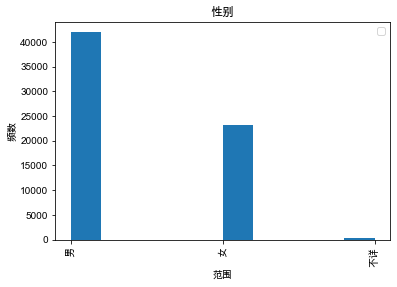

副高    21880
正高    19842
中级    18390
初级     5296
Name: 医生职称, dtype: int64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


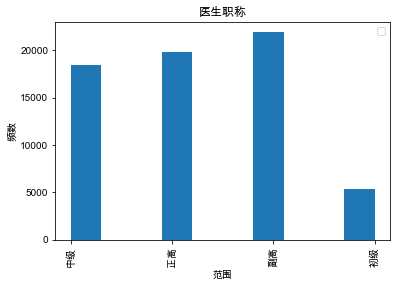

外科         14101
内科         10239
儿科学         6742
中医学         5236
妇产科学        4708
骨外科         4364
皮肤性病科       2748
口腔科学        2358
耳鼻咽喉头颈科     2302
眼科学         2288
肿瘤科         2024
精神心理科       1586
生殖中心        1411
医学影像科        832
麻醉医学科        582
康复医学科        497
其他科室         427
传染病科         420
介入医学科        347
男科           309
烧伤科          235
特色医疗科        217
皮肤美容         166
运动医学科        159
老年病科         141
结核病科         118
病理科          118
中西医结合科       103
药剂科           99
营养科           91
全科            85
预防保健科         53
特诊科           50
口腔粘膜科         42
功能检查科         41
检验科           32
职业病科          32
口腔急诊科         21
碎石中心          20
中医感染内科        19
口腔预防科         16
护理咨询          16
肿瘤康复科          6
地方病科           3
IMCC           2
实验中心           2
Name: 标准科室, dtype: int64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


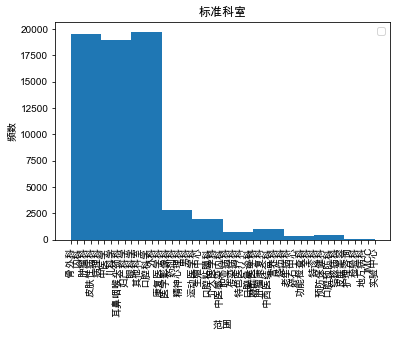

三级医院    61858
二级医院     3413
一级医院      137
Name: 医院级别, dtype: int64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


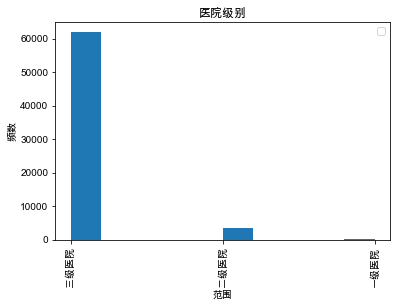

东部    43240
中部    14233
西部     7935
Name: 医院省份, dtype: int64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


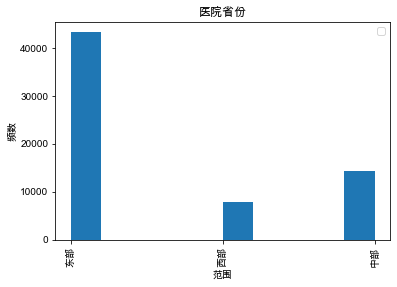

0      30911
1       4856
2       3214
3       2509
4       2207
       ...  
378        1
338        1
507        1
253        1
289        1
Name: 文章数, Length: 516, dtype: int64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


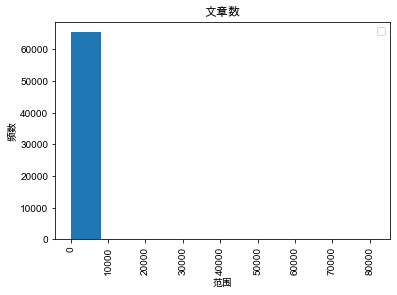

4319    237
698     158
4298    111
697     107
705     104
       ... 
1339      1
3929      1
2053      1
1326      1
1732      1
Name: 工龄, Length: 4213, dtype: int64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


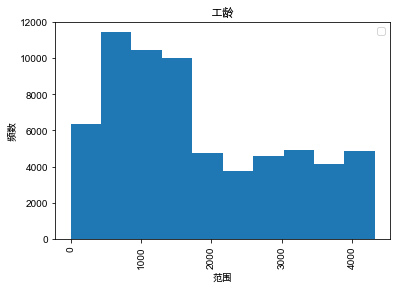

In [27]:
#统计分析
plt.rcParams['axes.unicode_minus']=False  #正常显示负号

#col_list = ['性别','医生职称','标准科室','医院级别','医院省份','综合推荐热度','在线问诊量','访问量','文章数','诊后报道患者数','患者投票','感谢信','心意礼物']
col_list = feature1_cat + feature2_num
for i in col_list:  
    print(data_2020[i].value_counts())
    
    #col = '性别'
    #num_bins = 20

    plt.hist(list(data_2020[i]))
    
    plt.xticks(rotation = 90)
    plt.legend()
    plt.xlabel('范围')
    plt.ylabel('频数')
    plt.title(i)

    # for i in range(len(x)):
    #     plt.text(list(x)[i]*1.01, x, list(x)[i], fontsize=10, color = "r", style = "italic", weight = "light", verticalalignment='center', horizontalalignment='right',rotation=0) #给散点加标签

    plt.show()

#### LTP文本分词

In [16]:
from ltp import LTP

ltp = LTP()     # 默认加载 Small 模型
                # ltp = LTP(path="small")
                #     其中 path 可接受的路径为下载下来的模型或者解压后的文件夹路径
                #     另外也可以接受一些已注册可自动下载的模型名(可使用 ltp.available_models() 查看): 
                #     base/base1/base2/small/tiny/GSD/GSD+CRF/GSDSimp/GSDSimp+CRF
#ltp.init_dict(path="/Users/jiangshihua/Desktop/THUOCL_medical.txt")#, max_window=4)
seg, hidden = ltp.seg(["他叫汤姆去拿外衣。"])
pos = ltp.pos(hidden)
ner = ltp.ner(hidden)
srl = ltp.srl(hidden)
dep = ltp.dep(hidden)
sdp = ltp.sdp(hidden)

# #命名实体识别
# tag, start, end = ner[0][0]
# print(tag,":", "".join(seg[0][start:end + 1]))

In [17]:
#文本分词
seg_list = []
temp_list = list(data_2020['擅长'])
#停用词
#stopwords = {}.fromkeys([line.rstrip() for line in open("/Users/jiangshihua/Desktop/stopwords.txt",encoding="GB18030")])
for i in range(len(temp_list)):
    if temp_list[i] != temp_list[i]:
        seg_list.append(np.nan)
    else:
        expert_list = []
        expert_list.append(temp_list[i])
        seg, hidden = ltp.seg(expert_list)
        for w in seg:
            if w != ' ':
                seg_list.append(seg)
data_2020['擅长'] =seg_list
#seg_list

#### k-prototypes聚类

In [18]:
#new_data_2020.columns
feature2_num = ['文章数','工龄','0', '>400', '＞0,≤50',
       '＞100,<=200', '＞200,<=400', '＞50,<=100'] 
feature1_cat = ['性别', '医生职称', '标准科室', '医院级别', '医院省份']

In [111]:
#data_2020.to_csv(r"/Users/jiangshihua/Desktop/2019_200.csv")
#data_2020 = pd.read_csv(r"/mnt/data/20年开放数据信息/2020_200.csv",index_col=0)
#data_2020_1 = pd.read_csv(r"/Users/jiangshihua/Desktop/大创/picture/2020/cluster=7/1.csv",index_col=0)

/var/folders/b9/cbcfk7cn21jgh4rpfnygpcmh0000gn/T/ipykernel_34708/3413401209.py:3: DtypeWarning: Columns (23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2020_1 = pd.read_csv(r"/Users/jiangshihua/Desktop/大创/picture/2020/cluster=7/1.csv",index_col=0)


In [113]:
#data_2020.drop(columns=['index','聚类结果'],inplace=True)

In [7]:
# data_2020 = (data_2020[~data_2020.医院.isin(['松原市中医院'])])

In [19]:
data_2020_2 = data_2020

In [20]:
data_2020 = toDict(data_2020,['性别','医生职称','标准科室','医院级别','医院省份'])

# 性别:['男' '女' '不详']
# 医生职称:['副高' '正高' '中级' '初级']
# 标准科室:['儿科学' '内科' '外科' '麻醉医学科' '妇产科学' '耳鼻咽喉头颈科' '骨外科' '口腔科学' '皮肤性病科' '眼科学' '肿瘤科'
#  '医学影像科' '老年病科' '运动医学科' '中医学' '烧伤科' '生殖中心' '男科' '介入医学科' '传染病科' '康复医学科'
#  '皮肤美容' '职业病科' '精神心理科' '全科' '营养科' '其他科室' '肿瘤康复科' '中西医结合科' '口腔粘膜科' '特色医疗科'
#  '病理科' '中医感染内科' '口腔急诊科' '预防保健科' '特诊科' '口腔预防科' '结核病科' '碎石中心' '护理咨询' '药剂科'
#  '实验中心' '检验科' '功能检查科' '地方病科' 'IMCC']
# 医院级别:['三级医院' '二级医院' '一级医院']
# 医院省份:['东部' '西部' '中部']

In [21]:
data_2020_3 = data_2020

In [22]:
#标准化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(data_2020[feature2_num])
data = list(x_train)
data_2020[feature2_num] = data
# #data = pd.concat([data, data_2020['聚类结果']], axis=1)
# data_2020 = pd.concat([data_2020[feature1_cat],data], axis=1)

In [26]:
#文本保存为txt
#data_2020['擅长'].to_csv('/mnt/data/20年开放数据信息/fenci_result.txt',sep='\t',index=False,header=False,encoding='utf-8')
data_2020['擅长'].to_csv('/Users/jiangshihua/Desktop/fenci_result.txt',sep='\t',index=False,header=False,encoding='utf-8')
#读取txt文本
#a=open('/mnt/data/20年开放数据信息/fenci_result.txt',encoding='UTF-8',errors='ignore').read().split('\n')
a=open('/Users/jiangshihua/Desktop/fenci_result.txt',encoding='UTF-8',errors='ignore').read().split('\n')
del a[-1]

In [29]:
#添加停用词
def get_custom_stopwords(stop_words_file):
    with open(stop_words_file,encoding='GB18030')as f:
        stopwords=f.read()
        stopwords_list=stopwords.split('\n')
        custom_stopwords_list=[i for i in stopwords_list]
    return custom_stopwords_list
stop_words_file=r"/Users/jiangshihua/Desktop/stopwords.txt"
stopwords=get_custom_stopwords(stop_words_file)

#文本向量化
from sklearn.feature_extraction.text import CountVectorizer
count_vec=CountVectorizer(stop_words=stopwords)
km_matrix= count_vec.fit_transform(a)
#km_matrix.shape
aaa = pd.DataFrame(km_matrix.toarray())

/Users/jiangshihua/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['exp', 'lex', '①①', '①②', '①④', '①⑤', '①⑦', '①⑧', '①⑨', '①ａ', '①ｂ', '①ｃ', '①ｄ', '①ｅ', '①ｆ', '①ｇ', '①ｈ', '①ｉ', '①ｏ', '②①', '②②', '②③', '②④', '②⑤', '②⑥', '②⑦', '②⑧', '②⑩', '②ａ', '②ｂ', '②ｄ', '②ｆ', '②ｇ', '②ｈ', '②ｉ', '②ｊ', '③①', '③⑩', '③ａ', '③ｂ', '③ｃ', '③ｄ', '③ｅ', '③ｆ', '③ｇ', '④ｂ', '④ｃ', '④ｄ', '④ｅ', '⑤ａ', '⑤ｂ', '⑤ｄ', '⑤ｅ', '⑤ｆ', '１２', 'ｌｉ', 'ｚｘｆｉｔｌ'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [ ]:
from sklearn.decomposition import TruncatedSVD
#svd = TruncatedSVD(100)
n_pick_topics = 200           # 设定主题数为3
lsa = TruncatedSVD(n_pick_topics)               
#X2 = lsa.fit_transform(X)
tfidf_lsa = lsa.fit_transform(aaa)
explained_variance = lsa.explained_variance_ratio_.sum()##降维后对原数据的方差贡献率，维度为1000时可解释率为55.13%
print(explained_variance)
print(tfidf_lsa.shape)##显示维度为（174021，100）

In [24]:
100
print(explained_variance)
print(tfidf_lsa.shape)##显示维度为（174021，100）
tfidf_lsa_1 = tfidf_lsa

0.43604060104572323
(64028, 100)


In [ ]:
200
print(explained_variance)
print(tfidf_lsa.shape)##显示维度为（174021，100）
tfidf_lsa_200 = tfidf_lsa

In [15]:
500
print(explained_variance)
print(tfidf_lsa.shape)##显示维度为（174021，100）
tfidf_lsa_500 = tfidf_lsa

0.6547226542678611
(64028, 500)


In [14]:
#1000
print(explained_variance)
print(tfidf_lsa.shape)##显示维度为（174021，100）
tfidf_lsa_2 = tfidf_lsa

0.7439224707812657
(64028, 1000)


In [28]:
#1500
print(explained_variance)
print(tfidf_lsa.shape)##显示维度为（174021，100）
tfidf_lsa_3 = tfidf_lsa

0.7917303102316338
(64028, 1500)


In [ ]:
#合并tfidf筛选词和data
tfidf_lsa_200 = pd.DataFrame(tfidf_lsa_200)
data_2020_1 = pd.concat([data_2020, tfidf_lsa_200],axis = 1)
data_2020 = pd.DataFrame(data_2020_1)

In [120]:
# data_2020_1 = delete_null_values(data_2020_1,'聚类结果')

In [ ]:
feature2_num = ['文章数','工龄','0', '>400', '＞0,≤50',
       '＞100,<=200', '＞200,<=400', '＞50,<=100'] + list(tfidf_lsa_200.columns)

In [44]:
#tfidf_lsa_1 = pd.read_csv('/mnt/data/20年开放数据信息/tfidf.csv',index_col=[0])
#tfidf_lsa_1.to_csv('/mnt/data/20年开放数据信息/tfidf.csv')

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 18533, ncost: 150892.6966666848
Run: 1, iteration: 2/100, moves: 6799, ncost: 147478.99258810864
Run: 1, iteration: 3/100, moves: 2998, ncost: 146760.25205165203
Run: 1, iteration: 4/100, moves: 988, ncost: 146685.12402308563
Run: 1, iteration: 5/100, moves: 258, ncost: 146680.31115343733
Run: 1, iteration: 6/100, moves: 49, ncost: 146680.1501671807
Run: 1, iteration: 7/100, moves: 3, ncost: 146680.14679104727
Run: 1, iteration: 8/100, moves: 0, ncost: 146680.14679104727
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 2931, ncost: 146713.99054202737
Run: 2, iteration: 2/100, moves: 519, ncost: 146681.66218466256
Run: 2, iteration: 3/100, moves: 119, ncost: 146680.19713835604
Run: 2, iteration: 4/100, moves: 24, ncost: 146680.14679104724
Run: 2, iteration: 5/100, moves: 0, ncost: 146680.14679104724
Init: initial

Run: 2, iteration: 8/100, moves: 119, ncost: 123814.7225389536
Run: 2, iteration: 9/100, moves: 68, ncost: 123814.6101957244
Run: 2, iteration: 10/100, moves: 23, ncost: 123814.59433888739
Run: 2, iteration: 11/100, moves: 7, ncost: 123814.59208250103
Run: 2, iteration: 12/100, moves: 8, ncost: 123814.58778808254
Run: 2, iteration: 13/100, moves: 9, ncost: 123814.58513771079
Run: 2, iteration: 14/100, moves: 8, ncost: 123814.58253286
Run: 2, iteration: 15/100, moves: 3, ncost: 123814.58188693649
Run: 2, iteration: 16/100, moves: 0, ncost: 123814.58188693649
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 15509, ncost: 127151.872244122
Run: 3, iteration: 2/100, moves: 5445, ncost: 125704.7647880367
Run: 3, iteration: 3/100, moves: 5639, ncost: 124726.35241841426
Run: 3, iteration: 4/100, moves: 4533, ncost: 124138.47856468457
Run: 3, iteration: 5/100, moves: 2814, ncost: 123907.98942886804
Run: 3, iteration: 6/100, moves: 

Run: 2, iteration: 13/100, moves: 37, ncost: 111271.08724984559
Run: 2, iteration: 14/100, moves: 18, ncost: 111271.06500599373
Run: 2, iteration: 15/100, moves: 2, ncost: 111271.0643531735
Run: 2, iteration: 16/100, moves: 0, ncost: 111271.0643531735
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 17061, ncost: 117464.11207927293
Run: 3, iteration: 2/100, moves: 5341, ncost: 116735.97076137431
Run: 3, iteration: 3/100, moves: 6011, ncost: 114190.41225799613
Run: 3, iteration: 4/100, moves: 7761, ncost: 112003.09236484235
Run: 3, iteration: 5/100, moves: 5276, ncost: 111415.42764218387
Run: 3, iteration: 6/100, moves: 1935, ncost: 111333.38456315213
Run: 3, iteration: 7/100, moves: 781, ncost: 111310.95741570728
Run: 3, iteration: 8/100, moves: 447, ncost: 111290.35073357448
Run: 3, iteration: 9/100, moves: 267, ncost: 111282.16878927496
Run: 3, iteration: 10/100, moves: 208, ncost: 111275.89448460731
Run: 3, iteration: 1

Run: 1, iteration: 20/100, moves: 753, ncost: 106458.92021885459
Run: 1, iteration: 21/100, moves: 1332, ncost: 106078.73211200049
Run: 1, iteration: 22/100, moves: 1636, ncost: 105580.87925914669
Run: 1, iteration: 23/100, moves: 1200, ncost: 105349.62568092078
Run: 1, iteration: 24/100, moves: 724, ncost: 105288.72494678448
Run: 1, iteration: 25/100, moves: 477, ncost: 105269.33279270928
Run: 1, iteration: 26/100, moves: 383, ncost: 105259.02413106019
Run: 1, iteration: 27/100, moves: 248, ncost: 105254.2978457065
Run: 1, iteration: 28/100, moves: 175, ncost: 105251.79461358009
Run: 1, iteration: 29/100, moves: 102, ncost: 105250.83548579038
Run: 1, iteration: 30/100, moves: 80, ncost: 105250.21103140488
Run: 1, iteration: 31/100, moves: 67, ncost: 105249.74395358122
Run: 1, iteration: 32/100, moves: 83, ncost: 105249.18757145897
Run: 1, iteration: 33/100, moves: 77, ncost: 105248.6913492486
Run: 1, iteration: 34/100, moves: 31, ncost: 105248.573227948
Run: 1, iteration: 35/100, move

Run: 3, iteration: 10/100, moves: 103, ncost: 103629.9897351186
Run: 3, iteration: 11/100, moves: 65, ncost: 103629.75160020983
Run: 3, iteration: 12/100, moves: 29, ncost: 103629.66713478879
Run: 3, iteration: 13/100, moves: 24, ncost: 103629.61286802308
Run: 3, iteration: 14/100, moves: 12, ncost: 103629.58649559345
Run: 3, iteration: 15/100, moves: 10, ncost: 103629.57064224994
Run: 3, iteration: 16/100, moves: 7, ncost: 103629.5552965598
Run: 3, iteration: 17/100, moves: 6, ncost: 103629.54364922407
Run: 3, iteration: 18/100, moves: 11, ncost: 103629.5004398457
Run: 3, iteration: 19/100, moves: 11, ncost: 103629.4609163541
Run: 3, iteration: 20/100, moves: 3, ncost: 103629.45736736375
Run: 3, iteration: 21/100, moves: 0, ncost: 103629.45736736375
Best run was number 1
[146680.14679104718, 131236.99555492614, 123814.58188693649, 118642.1346468941, 111271.0615135831, 107808.77459361953, 103606.41773538163, 103381.20155961676]


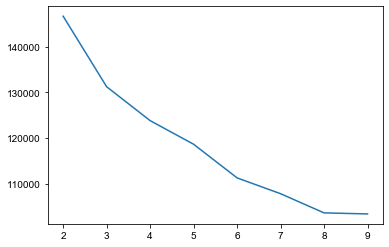

In [135]:
#手肘图寻找最优聚类中心
#from kmodes.kprototypes import KPrototypes

cost = []
for i in range(2, 10):
    kp = KPrototypes(n_clusters=i, init='Huang', n_init=3, verbose=1,random_state=42)
    kp.fit(data_2020[feature1_cat + feature2_num], categorical=[0, 1, 2, 3, 4])
    cost.append(kp.cost_)
    #print(cost)

print(cost)
x = range(2, 10)
plt.plot(x, cost)
plt.show()

In [ ]:
#import Ipynb_importer
#from kmodes.kprototypes import KPrototypes
#KPrototypes(kmodes.KModes)
def kprototypes_(data, data_label, n_clusters, categorical):
    kp = KPrototypes(n_clusters=n_clusters, init='Huang', n_init=3, verbose=1,random_state=42)
    kp.fit_predict(data[data_label], categorical=categorical)

    print(kp.cluster_centroids_)
    print(kp.labels_)
    
    #kp.labels_
    #kp.cost_
    #kp.n_iter_
    #kp.epoch_costs_

    cluster = list(kp.labels_)
    data['聚类结果'] = cluster
    return kp,data
kp,data_2020 = kprototypes_(data_2020, feature1_cat + feature2_num, 8, [0,1,2,3,4])

In [ ]:
#Huang
kp.cost_

In [143]:
#import Ipynb_importer
#from kmodes.kprototypes import KPrototypes
#KPrototypes(kmodes.KModes)
def kprototypes_(data, data_label, n_clusters, categorical):
    kp = KPrototypes(n_clusters=n_clusters, init='Cao', n_init=3, verbose=1,random_state=42)
    kp.fit_predict(data[data_label], categorical=categorical)

    print(kp.cluster_centroids_)
    print(kp.labels_)
    
    #kp.labels_
    #kp.cost_
    #kp.n_iter_
    #kp.epoch_costs_

    cluster = list(kp.labels_)
    data['聚类结果'] = cluster
    return kp,data
kp,data_2020 = kprototypes_(data_2020, feature1_cat + feature2_num, 8, [0,1,2,3,4])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 26765, ncost: 110035.95433935331
Run: 1, iteration: 2/100, moves: 9834, ncost: 107836.145769671
Run: 1, iteration: 3/100, moves: 4700, ncost: 107272.44768931156
Run: 1, iteration: 4/100, moves: 1899, ncost: 107151.68750349959
Run: 1, iteration: 5/100, moves: 1130, ncost: 107034.70759623375
Run: 1, iteration: 6/100, moves: 857, ncost: 106928.21503285943
Run: 1, iteration: 7/100, moves: 601, ncost: 106896.46638330344
Run: 1, iteration: 8/100, moves: 403, ncost: 106877.65929465544
Run: 1, iteration: 9/100, moves: 286, ncost: 106867.58916880503
Run: 1, iteration: 10/100, moves: 199, ncost: 106863.61933674586
Run: 1, iteration: 11/100, moves: 134, ncost: 106861.91966776528
Run: 1, iteration: 12/100, moves: 71, ncost: 106861.43292077786
Run: 1, iteration: 13/100, moves: 43, ncost: 106861.15888928977
Run: 1

/var/folders/b9/cbcfk7cn21jgh4rpfnygpcmh0000gn/T/ipykernel_34708/1907861649.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['聚类结果'] = cluster


In [144]:
#Cao
kp.cost_

104558.18498209266

#### improved k-prototypes

In [ ]:
"""
K-prototypes clustering for mixed categorical and numerical data
"""

# pylint: disable=unused-argument,attribute-defined-outside-init
#_k_prototypes_single_i = 0
from collections import defaultdict

import numpy as np
from joblib import Parallel, delayed
from scipy import sparse
from sklearn.utils import check_random_state
from sklearn.utils.validation import check_array

# from . import kmodes
# from .util import get_max_value_key, encode_features, get_unique_rows, \
#     decode_centroids, pandas_to_numpy
# from .util.dissim import matching_dissim, euclidean_dissim
# from .util.init_methods import init_cao, init_huang

import kmodes
from util.__init__ import get_max_value_key, encode_features, get_unique_rows, \
    decode_centroids, pandas_to_numpy
from util.dissim import matching_dissim, euclidean_dissim
from util.init_methods import init_cao, init_huang

# Number of tries we give the initialization methods to find non-empty
# clusters before we switch to random initialization.
MAX_INIT_TRIES = 20
# Number of tries we give the initialization before we raise an
# initialization error.
RAISE_INIT_TRIES = 100


class KPrototypes(kmodes.KModes):
    """k-protoypes clustering algorithm for mixed numerical/categorical data.

    Parameters
    -----------
    n_clusters : int, optional, default: 8
        The number of clusters to form as well as the number of
        centroids to generate.

    max_iter : int, default: 100
        Maximum number of iterations of the k-modes algorithm for a
        single run.

    num_dissim : func, default: euclidian_dissim
        Dissimilarity function used by the algorithm for numerical variables.
        Defaults to the Euclidian dissimilarity function.

    cat_dissim : func, default: matching_dissim
        Dissimilarity function used by the kmodes algorithm for categorical variables.
        Defaults to the matching dissimilarity function.

    n_init : int, default: 10
        Number of time the k-modes algorithm will be run with different
        centroid seeds. The final results will be the best output of
        n_init consecutive runs in terms of cost.

    init : {'Huang', 'Cao', 'random' or a list of ndarrays}, default: 'Cao'
        Method for initialization:
        'Huang': Method in Huang [1997, 1998]
        'Cao': Method in Cao et al. [2009]
        'random': choose 'n_clusters' observations (rows) at random from
        data for the initial centroids.
        If a list of ndarrays is passed, it should be of length 2, with
        shapes (n_clusters, n_features) for numerical and categorical
        data respectively. These are the initial encoded centroids.

    gamma : float, default: None
        Weighing factor that determines relative importance of numerical vs.
        categorical attributes (see discussion in Huang [1997]). By default,
        automatically calculated from data.

    verbose : integer, optional
        Verbosity mode.

    random_state : int, RandomState instance or None, optional, default: None
        If int, random_state is the seed used by the random number generator;
        If RandomState instance, random_state is the random number generator;
        If None, the random number generator is the RandomState instance used
        by `np.random`.

    n_jobs : int, default: 1
        The number of jobs to use for the computation. This works by computing
        each of the n_init runs in parallel.
        If -1 all CPUs are used. If 1 is given, no parallel computing code is
        used at all, which is useful for debugging. For n_jobs below -1,
        (n_cpus + 1 + n_jobs) are used. Thus for n_jobs = -2, all CPUs but one
        are used.

    Attributes
    ----------
    cluster_centroids_ : array, [n_clusters, n_features]
        Categories of cluster centroids

    labels_ :
        Labels of each point

    cost_ : float
        Clustering cost, defined as the sum distance of all points to
        their respective cluster centroids.

    n_iter_ : int
        The number of iterations the algorithm ran for.

    epoch_costs_ :
        The cost of the algorithm at each epoch from start to completion.

    gamma : float
        The (potentially calculated) weighing factor.

    Notes
    -----
    See:
    Huang, Z.: Extensions to the k-modes algorithm for clustering large
    data sets with categorical values, Data Mining and Knowledge
    Discovery 2(3), 1998.

    """
    def __init__(self, n_clusters=8, max_iter=100, num_dissim=euclidean_dissim,
                 cat_dissim=matching_dissim, init='Cao', n_init=10, gamma=None,
                 verbose=0, random_state=None, n_jobs=1):

        super(KPrototypes, self).__init__(n_clusters, max_iter, cat_dissim, init,
                                          verbose=verbose, random_state=random_state,
                                          n_jobs=n_jobs)
        self.num_dissim = num_dissim
        self.gamma = gamma
        self.n_init = n_init
        if isinstance(self.init, list) and self.n_init > 1:
            if self.verbose:
                print("Initialization method is deterministic. "
                      "Setting n_init to 1.")
            self.n_init = 1

    def fit(self, X, y=None, categorical=None, sample_weight=None):
        """Compute k-prototypes clustering.

        Parameters
        ----------
        X : array-like, shape=[n_samples, n_features]
        categorical : Index of columns that contain categorical data

        sample_weight : sequence, default: None
        The weight that is assigned to each individual data point when
        updating the centroids.

        """
        if categorical is not None:
            assert isinstance(categorical, (int, list, tuple)), f"The 'categorical' \
                argument needs to be an integer with the index of the categorical \
                column in your data, or a list or tuple of several of them, \
                but it is a {type(categorical)}."

        X = pandas_to_numpy(X)

        random_state = check_random_state(self.random_state)
        kmodes._validate_sample_weight(sample_weight, n_samples=X.shape[0],
                                       n_clusters=self.n_clusters)

        # If self.gamma is None, gamma will be automatically determined from
        # the data. The function below returns its value.
        self._enc_cluster_centroids, self._enc_map, self.labels_, self.cost_, \
        self.n_iter_, self.epoch_costs_, self.gamma = k_prototypes(
            X,
            categorical,
            self.n_clusters,
            self.max_iter,
            self.num_dissim,
            self.cat_dissim,
            self.gamma,
            self.init,
            self.n_init,
            self.verbose,
            random_state,
            self.n_jobs,
            sample_weight,
        )

        return self

    def predict(self, X, categorical=None, **kwargs):
        """Predict the closest cluster each sample in X belongs to.

        Parameters
        ----------
        X : array-like, shape = [n_samples, n_features]
            New data to predict.
        categorical : Indices of columns that contain categorical data

        Returns
        -------
        labels : array, shape [n_samples,]
            Index of the cluster each sample belongs to.
        """
        assert hasattr(self, '_enc_cluster_centroids'), "Model not yet fitted."

        if categorical is not None:
            assert isinstance(categorical, (int, list, tuple)), f"The 'categorical' \
                argument needs to be an integer with the index of the categorical \
                column in your data, or a list or tuple of several of them, \
                but it is a {type(categorical)}."

        X = pandas_to_numpy(X)
        Xnum, Xcat = _split_num_cat(X, categorical)
        Xnum, Xcat = check_array(Xnum), check_array(Xcat, dtype=None)
        Xcat, _ = encode_features(Xcat, enc_map=self._enc_map)
        return labels_cost(Xnum, Xcat, self._enc_cluster_centroids,
                           self.num_dissim, self.cat_dissim, self.gamma)[0]

    @property
    def cluster_centroids_(self):
        if hasattr(self, '_enc_cluster_centroids'):
            return np.hstack((
                self._enc_cluster_centroids[0],
                decode_centroids(self._enc_cluster_centroids[1], self._enc_map)
            ))
        raise AttributeError("'{}' object has no attribute 'cluster_centroids_' "
                             "because the model is not yet fitted.")


def labels_cost(Xnum, Xcat, centroids, num_dissim, cat_dissim, gamma,
                membship=None, sample_weight=None):
    """Calculate labels and cost function given a matrix of points and
    a list of centroids for the k-prototypes algorithm.
    """

    n_points = Xnum.shape[0]
    Xnum = check_array(Xnum)

    cost = 0.
    labels = np.empty(n_points, dtype=np.uint16)
    for ipoint in range(n_points):
        # Numerical cost = sum of Euclidean distances
        num_costs = num_dissim(centroids[0], Xnum[ipoint])
        cat_costs = cat_dissim(centroids[1], Xcat[ipoint], X=Xcat, membship=membship)
        # Gamma relates the categorical cost to the numerical cost.
        tot_costs = num_costs + gamma * cat_costs
        clust = np.argmin(tot_costs)
        labels[ipoint] = clust
        if sample_weight is not None:
            cost += tot_costs[clust] * sample_weight[ipoint]
        else:
            cost += tot_costs[clust]

    return labels, cost


def k_prototypes(X, categorical, n_clusters, max_iter, num_dissim, cat_dissim,
                 gamma, init, n_init, verbose, random_state, n_jobs, sample_weight=None):
    global _k_prototypes_single_i
    """k-prototypes algorithm"""
    random_state = check_random_state(random_state)
    if sparse.issparse(X):
        raise TypeError("k-prototypes does not support sparse data.")

    if categorical is None or not categorical:
        raise NotImplementedError(
            "No categorical data selected, effectively doing k-means. "
            "Present a list of categorical columns, or use scikit-learn's "
            "KMeans instead."
        )
    if isinstance(categorical, int):
        categorical = [categorical]
    assert len(categorical) != X.shape[1], \
        "All columns are categorical, use k-modes instead of k-prototypes."
    assert max(categorical) < X.shape[1], \
        "Categorical index larger than number of columns."

    ncatattrs = len(categorical)
    nnumattrs = X.shape[1] - ncatattrs
    n_points = X.shape[0]
    assert n_clusters <= n_points, f"Cannot have more clusters ({n_clusters}) " \
                                   f"than data points ({n_points})."

    Xnum, Xcat = _split_num_cat(X, categorical)
    Xnum, Xcat = check_array(Xnum), check_array(Xcat, dtype=None)

    # Convert the categorical values in Xcat to integers for speed.
    # Based on the unique values in Xcat, we can make a mapping to achieve this.
    Xcat, enc_map = encode_features(Xcat)

    # Are there more n_clusters than unique rows? Then set the unique
    # rows as initial values and skip iteration.
    unique = get_unique_rows(X)
    n_unique = unique.shape[0]
    if n_unique <= n_clusters:
        max_iter = 0
        n_init = 1
        n_clusters = n_unique
        init = list(_split_num_cat(unique, categorical))
        init[1], _ = encode_features(init[1], enc_map)

    # Estimate a good value for gamma, which determines the weighing of
    # categorical values in clusters (see Huang [1997]).
    if gamma is None:
        gamma = 0.5 * Xnum.std()

    results = []
    seeds = random_state.randint(np.iinfo(np.int32).max, size=n_init)
    if n_jobs == 1:
        _k_prototypes_single_i = 0
        for init_no in range(n_init):
            results.append(_k_prototypes_single(Xnum, Xcat, nnumattrs, ncatattrs,
                                                n_clusters, n_points, max_iter,
                                                num_dissim, cat_dissim, gamma,
                                                init, init_no, verbose, seeds[init_no],
                                                sample_weight))
    else:
        _k_prototypes_single_i = 0
        results = Parallel(n_jobs=n_jobs, verbose=0)(
            delayed(_k_prototypes_single)(Xnum, Xcat, nnumattrs, ncatattrs,
                                          n_clusters, n_points, max_iter,
                                          num_dissim, cat_dissim, gamma,
                                          init, init_no, verbose, seed, sample_weight)
            for init_no, seed in enumerate(seeds))
    all_centroids, all_labels, all_costs, all_n_iters, all_epoch_costs = zip(*results)

    best = np.argmin(all_costs)
    if n_init > 1 and verbose:
        print(f"Best run was number {best + 1}")

    # Note: return gamma in case it was automatically determined.
    return all_centroids[best], enc_map, all_labels[best], all_costs[best], \
        all_n_iters[best], all_epoch_costs[best], gamma

def _k_prototypes_single(Xnum, Xcat, nnumattrs, ncatattrs, n_clusters, n_points,
                         max_iter, num_dissim, cat_dissim, gamma, init, init_no,
                         verbose, random_state, sample_weight=None):
    global _k_prototypes_single_i
    
    # For numerical part of initialization, we don't have a guarantee
    # that there is not an empty cluster, so we need to retry until
    # there is none.
    random_state = check_random_state(random_state)
    init_tries = 0
    while True:
        init_tries += 1
        # _____ INIT _____
        if verbose:
            print("Init: initializing centroids")
        if isinstance(init, str) and init.lower() == 'huang':
            centroids = init_huang(Xcat, n_clusters, cat_dissim, random_state)
        elif isinstance(init, str) and init.lower() == 'cao':
            centroids = init_cao(Xcat, n_clusters, cat_dissim)
        elif isinstance(init, str) and init.lower() == 'random':
            seeds = random_state.choice(range(n_points), n_clusters)
            centroids = Xcat[seeds]
        elif isinstance(init, list):
            # Make sure inits are 2D arrays.
            init = [np.atleast_2d(cur_init).T if len(cur_init.shape) == 1
                    else cur_init
                    for cur_init in init]
            assert init[0].shape[0] == n_clusters, \
                "Wrong number of initial numerical centroids in init " \
                f"({init[0].shape[0]}, should be {n_clusters})."
            assert init[0].shape[1] == nnumattrs, \
                "Wrong number of numerical attributes in init " \
                f"({init[0].shape[1]}, should be {nnumattrs})."
            assert init[1].shape[0] == n_clusters, \
                "Wrong number of initial categorical centroids in init " \
                f"({init[1].shape[0]}, should be {n_clusters})."
            assert init[1].shape[1] == ncatattrs, \
                "Wrong number of categorical attributes in init " \
                f"({init[1].shape[1]}, should be {ncatattrs})."
            centroids = [np.asarray(init[0], dtype=np.float64),
                         np.asarray(init[1], dtype=np.uint16)]
        else:
            raise NotImplementedError("Initialization method not supported.")

        if not isinstance(init, list):
            # Numerical is initialized by drawing from normal distribution,
            # categorical following the k-modes methods.
            meanx = np.mean(Xnum, axis=0)
            stdx = np.std(Xnum, axis=0)
            centroids = [
                meanx + random_state.randn(n_clusters, nnumattrs) * stdx,
                centroids
            ]

#             #improved
#             sorted_Xnum = np.sort(Xnum,axis=0)
#             b=sorted_Xnum[len(Xnum)*_k_prototypes_single_i//Xnum.shape[1]+1:len(Xnum)*(_k_prototypes_single_i+1)//Xnum.shape[1]+1]
#             meanx = np.mean(b, axis=0)
#             stdx = np.std(b, axis=0)
#             centroids = [
#                 meanx + random_state.randn(n_clusters, nnumattrs) * stdx,
#                 centroids
#             ]             
#             _k_prototypes_single_i+=1
                
#             print(f"i:{i}")
#             print(f"n_clusters:{n_clusters}")
#             print(len(Xnum))

#             print(f"Xnum:{Xnum}")
#             print(f"meanx:{meanx}")
#             print(f"stdx:{stdx}")
#             print(f"centroids:{centroids}")
#             print(_k_prototypes_single_i)
            
        if verbose:
            print("Init: initializing clusters")
        membship = np.zeros((n_clusters, n_points), dtype=np.bool_)
        # Keep track of the sum of attribute values per cluster so that we
        # can do k-means on the numerical attributes.
        cl_attr_sum = np.zeros((n_clusters, nnumattrs), dtype=np.float64)
        # Same for the membership sum per cluster
        cl_memb_sum = np.zeros(n_clusters, dtype=np.float64)
        # cl_attr_freq is a list of lists with dictionaries that contain
        # the frequencies of values per cluster and attribute.
        cl_attr_freq = [[defaultdict(float) for _ in range(ncatattrs)]
                        for _ in range(n_clusters)]
        for ipoint in range(n_points):
            weight = sample_weight[ipoint] if sample_weight is not None else 1
            # Initial assignment to clusters
            clust = np.argmin(
                num_dissim(centroids[0], Xnum[ipoint]) + gamma *
                cat_dissim(centroids[1], Xcat[ipoint], X=Xcat, membship=membship)
            )
            membship[clust, ipoint] = 1
            cl_memb_sum[clust] += weight
            # Count attribute values per cluster.
            for iattr, curattr in enumerate(Xnum[ipoint]):
                cl_attr_sum[clust, iattr] += curattr * weight
            for iattr, curattr in enumerate(Xcat[ipoint]):
                cl_attr_freq[clust][iattr][curattr] += weight

        # If no empty clusters, then consider initialization finalized.
        if membship.sum(axis=1).min() > 0:
            break

        if init_tries == MAX_INIT_TRIES:
            # Could not get rid of empty clusters. Randomly
            # initialize instead.
            init = 'random'
        elif init_tries == RAISE_INIT_TRIES:
            raise ValueError(
                "Clustering algorithm could not initialize. "
                "Consider assigning the initial clusters manually."
            )

    # Perform an initial centroid update.
    for ik in range(n_clusters):
        for iattr in range(nnumattrs):
            centroids[0][ik, iattr] = cl_attr_sum[ik, iattr] / cl_memb_sum[ik]
        for iattr in range(ncatattrs):
            centroids[1][ik, iattr] = get_max_value_key(cl_attr_freq[ik][iattr])

    # _____ ITERATION _____
    if verbose:
        print("Starting iterations...")
    itr = 0
    labels = None
    converged = False

    _, cost = labels_cost(Xnum, Xcat, centroids,
                          num_dissim, cat_dissim, gamma, membship, sample_weight)

    epoch_costs = [cost]
    while itr < max_iter and not converged:
        itr += 1
        centroids, cl_attr_sum, cl_memb_sum, cl_attr_freq, membship, moves = \
            _k_prototypes_iter(Xnum, Xcat, centroids, cl_attr_sum, cl_memb_sum,
                               cl_attr_freq, membship, num_dissim, cat_dissim,
                               gamma, random_state, sample_weight)

        # All points seen in this iteration
        labels, ncost = labels_cost(Xnum, Xcat, centroids,
                                    num_dissim, cat_dissim, gamma, membship, sample_weight)
        converged = (moves == 0) or (ncost >= cost)
        epoch_costs.append(ncost)
        cost = ncost
        if verbose:
            print(f"Run: {init_no + 1}, iteration: {itr}/{max_iter}, "
                  f"moves: {moves}, ncost: {ncost}")

    return centroids, labels, cost, itr, epoch_costs


def _k_prototypes_iter(Xnum, Xcat, centroids, cl_attr_sum, cl_memb_sum, cl_attr_freq,
                       membship, num_dissim, cat_dissim, gamma, random_state, sample_weight):
    """Single iteration of the k-prototypes algorithm"""
    global _k_prototypes_single_i
    moves = 0
    _k_prototypes_single_i = 0
    for ipoint in range(Xnum.shape[0]):
        weight = sample_weight[ipoint] if sample_weight is not None else 1
        clust = np.argmin(
            num_dissim(centroids[0], Xnum[ipoint]) +
            gamma * cat_dissim(centroids[1], Xcat[ipoint], X=Xcat, membship=membship)
        )
        if membship[clust, ipoint]:
            # Point is already in its right place.
            continue

        # Move point, and update old/new cluster frequencies and centroids.
        moves += 1
        old_clust = np.argwhere(membship[:, ipoint])[0][0]

        # Note that membship gets updated by kmodes.move_point_cat.
        # move_point_num only updates things specific to the k-means part.
        cl_attr_sum, cl_memb_sum = _move_point_num(
            Xnum[ipoint], clust, old_clust, cl_attr_sum, cl_memb_sum, weight
        )
        # noinspection PyProtectedMember
        cl_attr_freq, membship, centroids[1] = kmodes._move_point_cat(
            Xcat[ipoint], ipoint, clust, old_clust,
            cl_attr_freq, membship, centroids[1], weight
        )

        # Update old and new centroids for numerical attributes using
        # the means and sums of all values
        for iattr in range(len(Xnum[ipoint])):
            for curc in (clust, old_clust):
                if cl_memb_sum[curc]:
                    centroids[0][curc, iattr] = cl_attr_sum[curc, iattr] / cl_memb_sum[curc]
                else:
                    centroids[0][curc, iattr] = 0.

        # In case of an empty cluster, reinitialize with a random point
        # from largest cluster.
        if not cl_memb_sum[old_clust]:
            from_clust = membship.sum(axis=1).argmax()
            choices = [ii for ii, ch in enumerate(membship[from_clust, :]) if ch]
            rindx = random_state.choice(choices)

            cl_attr_sum, cl_memb_sum = _move_point_num(
                Xnum[rindx], old_clust, from_clust, cl_attr_sum, cl_memb_sum,
                weight
            )
            cl_attr_freq, membship, centroids[1] = kmodes._move_point_cat(
                Xcat[rindx], rindx, old_clust, from_clust,
                cl_attr_freq, membship, centroids[1], weight
            )

    return centroids, cl_attr_sum, cl_memb_sum, cl_attr_freq, membship, moves


def _move_point_num(point, to_clust, from_clust, cl_attr_sum, cl_memb_sum, sample_weight):
    """Move point between clusters, numerical attributes."""
    # Update sum of attributes in cluster.
    for iattr, curattr in enumerate(point):
        cl_attr_sum[to_clust][iattr] += curattr * sample_weight
        cl_attr_sum[from_clust][iattr] -= curattr * sample_weight
    # Update sums of memberships in cluster
    cl_memb_sum[to_clust] += 1
    cl_memb_sum[from_clust] -= 1
    return cl_attr_sum, cl_memb_sum


def _split_num_cat(X, categorical):
    """Extract numerical and categorical columns.
    Convert to numpy arrays, if needed.

    :param X: Feature matrix
    :param categorical: Indices of categorical columns
    """
    Xnum = np.asanyarray(X[:, [ii for ii in range(X.shape[1])
                               if ii not in categorical]]).astype(np.float64)
    Xcat = np.asanyarray(X[:, categorical])
    return Xnum, Xcat


In [146]:
#KPrototypes()
def kprototypes_(data, data_label, n_clusters, categorical):
    kp = KPrototypes(n_clusters=n_clusters, init='Cao', n_init=3, verbose=1,random_state=42,n_jobs=1)
    kp.fit_predict(data[data_label], categorical=categorical)

    print(kp.cluster_centroids_)
    print(kp.labels_)
    
    #kp.labels_
    #kp.cost_
    #kp.n_iter_
    #kp.epoch_costs_

    cluster = list(kp.labels_)
    data['聚类结果'] = cluster
    return kp,data
kp,data_2020 = kprototypes_(data_2020, feature1_cat + feature2_num, 8, [0,1,2,3,4])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 48474, ncost: 112817.92923695671
Run: 1, iteration: 2/100, moves: 12696, ncost: 109179.95409316602
Run: 1, iteration: 3/100, moves: 6636, ncost: 106751.05187609592
Run: 1, iteration: 4/100, moves: 3941, ncost: 105717.80481996316
Run: 1, iteration: 5/100, moves: 2629, ncost: 105369.11923677429
Run: 1, iteration: 6/100, moves: 1614, ncost: 105294.53719525601
Run: 1, iteration: 7/100, moves: 1034, ncost: 105268.59332868553
Run: 1, iteration: 8/100, moves: 701, ncost: 105255.19143440643
Run: 1, iteration: 9/100, moves: 369, ncost: 105251.84809420424
Run: 1, iteration: 10/100, moves: 257, ncost: 105250.19746253856
Run: 1, iteration: 11/100, moves: 160, ncost: 105249.26847285526
Run: 1, iteration: 12/100, moves: 101, ncost: 105248.83353582678
Run: 1,

/var/folders/b9/cbcfk7cn21jgh4rpfnygpcmh0000gn/T/ipykernel_34708/1404698789.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['聚类结果'] = cluster


In [147]:
#Cao improved
kp.cost_

105248.51867515424

In [148]:
#KPrototypes()
def kprototypes_(data, data_label, n_clusters, categorical):
    kp = KPrototypes(n_clusters=n_clusters, init='Huang', n_init=3, verbose=1,random_state=42)
    kp.fit_predict(data[data_label], categorical=categorical)

    print(kp.cluster_centroids_)
    print(kp.labels_)
    
    #kp.labels_
    #kp.cost_
    #kp.n_iter_
    #kp.epoch_costs_

    cluster = list(kp.labels_)
    data['聚类结果'] = cluster
    return kp,data
kp,data_2020 = kprototypes_(data_2020, feature1_cat + feature2_num, 8, [0,1,2,3,4])

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 41936, ncost: 109303.43380871837
Run: 1, iteration: 2/100, moves: 12274, ncost: 106505.15379769124
Run: 1, iteration: 3/100, moves: 3794, ncost: 106135.47901921478
Run: 1, iteration: 4/100, moves: 1631, ncost: 106047.35171774542
Run: 1, iteration: 5/100, moves: 1010, ncost: 106001.19247459182
Run: 1, iteration: 6/100, moves: 744, ncost: 105965.16860066119
Run: 1, iteration: 7/100, moves: 660, ncost: 105929.20755754314
Run: 1, iteration: 8/100, moves: 765, ncost: 105883.3417080427
Run: 1, iteration: 9/100, moves: 886, ncost: 105819.63976820947
Run: 1, iteration: 10/100, moves: 781, ncost: 105762.69447590978
Run: 1, iteration: 11/100, moves: 601, ncost: 105730.24161705091
Run: 1, iteration: 12/100, moves: 201, ncost: 105725.9472843343
Run: 1, iteration: 13/100, moves: 77, ncost: 105724.55518731163
Run: 1, iteration: 14/1

/var/folders/b9/cbcfk7cn21jgh4rpfnygpcmh0000gn/T/ipykernel_34708/3272357017.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['聚类结果'] = cluster


In [149]:
#Huang improved
kp.cost_

104837.61959284583

In [ ]:
#保存结果
data_2020_2 = pd.concat([data_2020_2,data_2020.loc[:,'聚类结果']], axis=1)
data_2020_2.to_csv("/Users/jiangshihua/Desktop/1.csv")

In [ ]:
data_2020_3 = pd.concat([data_2020_3,data_2020.loc[:,'聚类结果']], axis=1)
data_2020_3.to_csv("/Users/jiangshihua/Desktop/2.csv")

In [31]:
#删除异常值 0、1两类
data_2020 = data_2020[~data_2020['聚类结果'].isin([0])]
data_2020.reset_index(inplace=True)
data_2020.drop(columns=['index','聚类结果'],inplace=True)

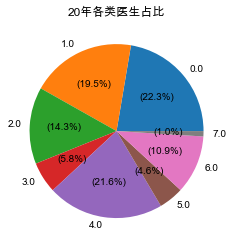

In [189]:
num_list = []
for i in np.sort(data_2020['聚类结果'].unique()):
    num_list.append(sum(data_2020['聚类结果'] == i))
num_ = dict(zip(np.sort(data_2020['聚类结果'].unique(),axis=0),num_list))

y = np.array(list(num_.values()))
#中文设置
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.pie(y,
        labels=np.sort(data_2020['聚类结果'].unique()),  # 设置饼图标签
        autopct="(%1.1f%%)" #饼块内标签。
        #colors=("r", "blue", "#88c999", "y")，
        #设置各饼块的颜色，r表示red，blue代表蓝色
        #88c998十六进制表示绿色 （1,1,0）以元组形式表示黄色
        #explode=[0, 0, 0.1, 0] #
        )
plt.title("20年各类医生占比")
plt.show()



#### PCA and tsne可视化

In [60]:
#data_2020 = pd.read_csv('/mnt/data/20年开放数据信息/2020_Cao.csv',index_col=[0])

/root/miniconda3/envs/myconda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (22,23) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [174]:
#data_2020_1 = pd.read_csv('/Users/jiangshihua/Desktop/大创/picture/2020/cluster=7/1.csv',index_col=0)

/var/folders/b9/cbcfk7cn21jgh4rpfnygpcmh0000gn/T/ipykernel_34708/3137567525.py:1: DtypeWarning: Columns (23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2020_1 = pd.read_csv('/Users/jiangshihua/Desktop/大创/picture/2020/cluster=7/1.csv',index_col=0)


In [177]:
#data_2020_1.drop(columns=['index','聚类结果'],inplace=True)

In [155]:
from sklearn.decomposition import PCA
# 实例化PCA，并实现数据降维
pca_2 = PCA(n_components=2)
data_2020_dim2 = pca_2.fit_transform(data_2020[feature1_cat+feature2_num])

In [156]:
# 通过explained_variance_s属性查看降维后的每个特征的可解释性方差的大小
# 方差越大带有的有效信息越大
pca_2.explained_variance_

array([48.28906022,  1.31033543])

In [157]:
# 通过explained_variance_ratio_属性查看降维后的每个特征所占信息量占原始信息量的比例
pca_2.explained_variance_ratio_

array([0.90888419, 0.02466279])

In [158]:
# 查看降维后的所有特征信息量占原始数据的比例
pca_2.explained_variance_ratio_.sum()

0.9335469796536535

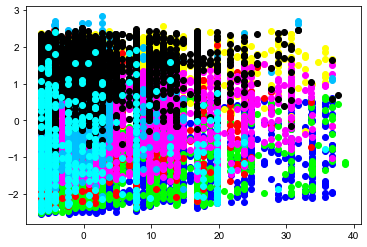

In [160]:
# 可视化
# 将第一个特征作为x，第二个特征作为y
y=np.array(data_2020['聚类结果'])

color = ['#0000FF','#00FF00','#FFFF00','#FF0000','#FF00FF','#00BFFF','#000000','#00FFFF']
# '#0000FF','#00FF00','#FFFF00','#FF0000','#FF00FF','#00BFFF','#000000'
# 取出标签中的所有类别
label = np.unique(y) # [0, 1, 2]

for i in label :
    # 这里采用的是bool索引
    x = data_2020_dim2[y==i, 0]
    y1 = data_2020_dim2[y==i, 1]
    plt.scatter(x, y1, c=color[i])

plt.show()

In [163]:
from sklearn.manifold import TSNE
clus = ['聚类结果']
#new_data_2020[feature1_cat + feature1_num ]

def GetData(data,data_label):
#    df = pd.DataFrame(columns = ['id', 'advertiser_id', 'ad_id', 'time', 'stat_cost','show_cnt', 'ctr', 'cpm_platform', 'click_cnt', 'pay_order_count', 'create_order_amount', 'prepay_and_pay_order_roi', 'prepay_order_count', 'prepay_order_amount', 'create_order_count', 'pay_order_amount', 'create_order_roi', 'dy_follow', 'convert_cnt', 'convert_cost', 'convert_rate', 'dy_share', 'dy_comment', 'dy_like', 'live_pay_order_cost_per_order', 'luban_live_enter_cnt', 'live_watch_one_minute_count', 'live_fans_club_join_cnt', 'luban_live_slidecart_click_cnt', 'luban_live_click_product_cnt', 'luban_live_comment_cnt', 'luban_live_share_cnt', 'luban_live_gift_cnt', 'luban_live_gift_amount', 'create_time', 'update_time', 'class_id'])
#    for advertiser_name in advertiser_name_list:
#        fileLoc = "Data/task_data/convert_" + advertiser_name + ".csv"
        # 取前1000行数据
#       temp = pd.read_csv(fileLoc, skiprows=0, nrows=2000)
#         print(temp)
#        df = pd.concat([df, temp], ignore_index=True)
    
#    data = df.drop(columns=['id', 'advertiser_id', 'ad_id', 'dy_share', 'dy_comment', 'dy_like', 'time', 'create_time', 'update_time', 'class_id'])
    # 检查是否有缺失值
#     print(data.isnull().any())
    all_data = data[data_label]
    # 遍历所有列名，排除不需要的
    cols = [i for i in all_data.columns if i not in all_data['聚类结果']]
    data = all_data[cols]
    
    data_array = np.array(data)
    data_list = data_array.tolist()
    label = all_data.loc[:, '聚类结果']
    label_array = np.array(label)
    label_list = label_array.tolist()
#     print(data_list)
#     print(label_list)
    n_samples, n_features = data.shape
#     print(n_samples, n_features)
#     print(data)
#     print(label)
#     print(df)
    return data_list, label_list, n_samples, n_features


def PlotEmbedding(data, label, n_samples):
    x_min, x_max = np.min(data, 0), np.max(data, 0)
    data = (data - x_min) / (x_max - x_min)
    fig = plt.figure(figsize=(15, 10))
    ax = plt.subplot(111)#,projection='3d')
    
    colors = list()
    color_list = np.random.randint(100, size=9).tolist()
    for i in range(0, len(label)):
        colors.append(color_list[label[i]-1])
#     print(colors)
    
    type1_x = list()
    type1_y = list()
    type2_x = list()
    type2_y = list()
    type3_x = list()
    type3_y = list()
    type4_x = list()
    type4_y = list()
    type5_x = list()
    type5_y = list()
    type6_x = list()
    type6_y = list()
#     type1_z = list()
#     type2_z = list()
#     type3_z = list()
#     type4_z = list()
#     type5_z = list()
#     type6_z = list()
    type7_x = list()
    type7_y = list()
    #type7_z = list()
    type8_x = list()
    type8_y = list()
    #type8_z = list()
    
    for i in range(len(label)):
        if label[i] == 0:
            type1_x.append(data[i, 0])
            type1_y.append(data[i, 1])
            #type1_z.append(data[i, 2])
        if label[i] == 1:
            type2_x.append(data[i, 0])
            type2_y.append(data[i, 1])
            #type2_z.append(data[i, 2])
        if label[i] == 2:
            type3_x.append(data[i, 0])
            type3_y.append(data[i, 1])
            #type3_z.append(data[i, 2])
        if label[i] == 3:
            type4_x.append(data[i, 0])
            type4_y.append(data[i, 1])
            #type4_z.append(data[i, 2])
        if label[i] == 4:
            type5_x.append(data[i, 0])
            type5_y.append(data[i, 1])
            #type5_z.append(data[i, 2])
        if label[i] == 5:
            type6_x.append(data[i, 0])
            type6_y.append(data[i, 1])
            #type6_z.append(data[i, 2])
        if label[i] == 6:
            type7_x.append(data[i, 0])
            type7_y.append(data[i, 1])
            #type7_z.append(data[i, 2])
        if label[i] == 7:
            type8_x.append(data[i, 0])
            type8_y.append(data[i, 1])
            #type8_z.append(data[i, 2])
    
    type1 = ax.scatter(type1_x, type1_y, #type1_z,
                       c='#0000FF', marker='o', s=10)
    type2 = ax.scatter(type2_x, type2_y, #type2_z,
                       c='#00FF00', marker='o', s=10)
    type3 = ax.scatter(type3_x, type3_y, #type3_z,
                       c='#FFFF00', marker='o', s=10)
    type4 = ax.scatter(type4_x, type4_y, #type4_z,
                       c='#FF0000', marker='o', s=10)
    type5 = ax.scatter(type5_x, type5_y, #type5_z,
                       c='#FF00FF', marker='o', s=10)
    type6 = ax.scatter(type6_x, type6_y, #type6_z,
                       c='#00BFFF', marker='o', s=10)
    type7 = ax.scatter(type7_x, type7_y, #type7_z,
                       c='#000000', marker='o', s=10)
    type8 = ax.scatter(type8_x, type8_y, #type8_z,
                       c='#00FFFF', marker='o', s=10)

    ax.legend((type1, type2, type3, type4, type5, type6, type7, type8), ('0','1','2','3','4','5','6','7'), loc="upper right")
    

    plt.xticks()
    plt.yticks()
    plt.title("t-SNE Embedding", fontsize=14)
    #ax.view_init(20, 30)
    return fig


# 训练函数
def Train(qc_data,qc_data_label_roi):
    data, label, n_samples, n_features = GetData(qc_data,qc_data_label_roi)
    tsne = TSNE(n_components=2, init='pca', random_state=0)
    result = tsne.fit_transform(data)
    return result, label, n_samples, n_features, tsne

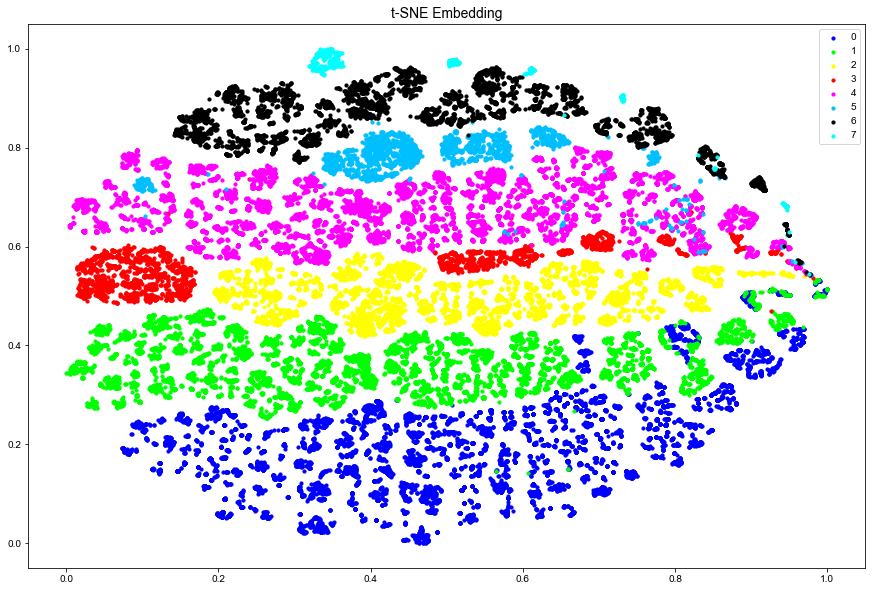

In [164]:
result, label, n_samples, n_features,tsne = Train(data_2020,feature1_cat +feature2_num + clus)
fig = PlotEmbedding(result, label, n_samples)
plt.show()

In [170]:
from sklearn.manifold import TSNE
clus = ['聚类结果']
#new_data_2020[feature1_cat + feature1_num ]

def GetData(data,data_label):
#    df = pd.DataFrame(columns = ['id', 'advertiser_id', 'ad_id', 'time', 'stat_cost','show_cnt', 'ctr', 'cpm_platform', 'click_cnt', 'pay_order_count', 'create_order_amount', 'prepay_and_pay_order_roi', 'prepay_order_count', 'prepay_order_amount', 'create_order_count', 'pay_order_amount', 'create_order_roi', 'dy_follow', 'convert_cnt', 'convert_cost', 'convert_rate', 'dy_share', 'dy_comment', 'dy_like', 'live_pay_order_cost_per_order', 'luban_live_enter_cnt', 'live_watch_one_minute_count', 'live_fans_club_join_cnt', 'luban_live_slidecart_click_cnt', 'luban_live_click_product_cnt', 'luban_live_comment_cnt', 'luban_live_share_cnt', 'luban_live_gift_cnt', 'luban_live_gift_amount', 'create_time', 'update_time', 'class_id'])
#    for advertiser_name in advertiser_name_list:
#        fileLoc = "Data/task_data/convert_" + advertiser_name + ".csv"
        # 取前1000行数据
#       temp = pd.read_csv(fileLoc, skiprows=0, nrows=2000)
#         print(temp)
#        df = pd.concat([df, temp], ignore_index=True)
    
#    data = df.drop(columns=['id', 'advertiser_id', 'ad_id', 'dy_share', 'dy_comment', 'dy_like', 'time', 'create_time', 'update_time', 'class_id'])
    # 检查是否有缺失值
#     print(data.isnull().any())
    all_data = data[data_label]
    # 遍历所有列名，排除不需要的
    cols = [i for i in all_data.columns if i not in all_data['聚类结果']]
    data = all_data[cols]
    
    data_array = np.array(data)
    data_list = data_array.tolist()
    label = all_data.loc[:, '聚类结果']
    label_array = np.array(label)
    label_list = label_array.tolist()
#     print(data_list)
#     print(label_list)
    n_samples, n_features = data.shape
#     print(n_samples, n_features)
#     print(data)
#     print(label)
#     print(df)
    return data_list, label_list, n_samples, n_features


def PlotEmbedding(data, label, n_samples):
    x_min, x_max = np.min(data, 0), np.max(data, 0)
    data = (data - x_min) / (x_max - x_min)
    fig = plt.figure(figsize=(15, 10))
    ax = plt.subplot(111,projection='3d')
    
    colors = list()
    color_list = np.random.randint(100, size=9).tolist()
    for i in range(0, len(label)):
        colors.append(color_list[label[i]-1])
#     print(colors)
    
    type1_x = list()
    type1_y = list()
    type2_x = list()
    type2_y = list()
    type3_x = list()
    type3_y = list()
    type4_x = list()
    type4_y = list()
    type5_x = list()
    type5_y = list()
    type6_x = list()
    type6_y = list()
    type1_z = list()
    type2_z = list()
    type3_z = list()
    type4_z = list()
    type5_z = list()
    type6_z = list()
    type7_x = list()
    type7_y = list()
    type7_z = list()
    type8_x = list()
    type8_y = list()
    type8_z = list()
    
    for i in range(len(label)):
        if label[i] == 0:
            type1_x.append(data[i, 0])
            type1_y.append(data[i, 1])
            type1_z.append(data[i, 2])
        if label[i] == 1:
            type2_x.append(data[i, 0])
            type2_y.append(data[i, 1])
            type2_z.append(data[i, 2])
        if label[i] == 2:
            type3_x.append(data[i, 0])
            type3_y.append(data[i, 1])
            type3_z.append(data[i, 2])
        if label[i] == 3:
            type4_x.append(data[i, 0])
            type4_y.append(data[i, 1])
            type4_z.append(data[i, 2])
        if label[i] == 4:
            type5_x.append(data[i, 0])
            type5_y.append(data[i, 1])
            type5_z.append(data[i, 2])
        if label[i] == 5:
            type6_x.append(data[i, 0])
            type6_y.append(data[i, 1])
            type6_z.append(data[i, 2])
        if label[i] == 6:
            type7_x.append(data[i, 0])
            type7_y.append(data[i, 1])
            type7_z.append(data[i, 2])
        if label[i] == 7:
            type8_x.append(data[i, 0])
            type8_y.append(data[i, 1])
            type8_z.append(data[i, 2])
    
    type1 = ax.scatter(type1_x, type1_y, type1_z,
                       c='#0000FF', marker='o', s=10)
    type2 = ax.scatter(type2_x, type2_y, type2_z,
                       c='#00FF00', marker='o', s=10)
    type3 = ax.scatter(type3_x, type3_y, type3_z,
                       c='#FFFF00', marker='o', s=10)
    type4 = ax.scatter(type4_x, type4_y, type4_z,
                       c='#FF0000', marker='o', s=10)
    type5 = ax.scatter(type5_x, type5_y, type5_z,
                       c='#FF00FF', marker='o', s=10)
    type6 = ax.scatter(type6_x, type6_y, type6_z,
                       c='#00BFFF', marker='o', s=10)
    type7 = ax.scatter(type7_x, type7_y, type7_z,
                       c='#000000', marker='o', s=10)
    type8 = ax.scatter(type8_x, type8_y, type8_z,
                       c='#00FFFF', marker='o', s=10)

    ax.legend((type1, type2, type3, type4, type5, type6, type7, type8), ('0','1','2','3','4','5','6','7'), loc="upper right")
    

    plt.xticks()
    plt.yticks()
    plt.title("t-SNE Embedding", fontsize=14)
    ax.view_init(20, 30)
    return fig


# 训练函数
def Train(qc_data,qc_data_label_roi):
    data, label, n_samples, n_features = GetData(qc_data,qc_data_label_roi)
    tsne = TSNE(n_components=3, init='pca', random_state=0)
    result = tsne.fit_transform(data)
    return result, label, n_samples, n_features, tsne

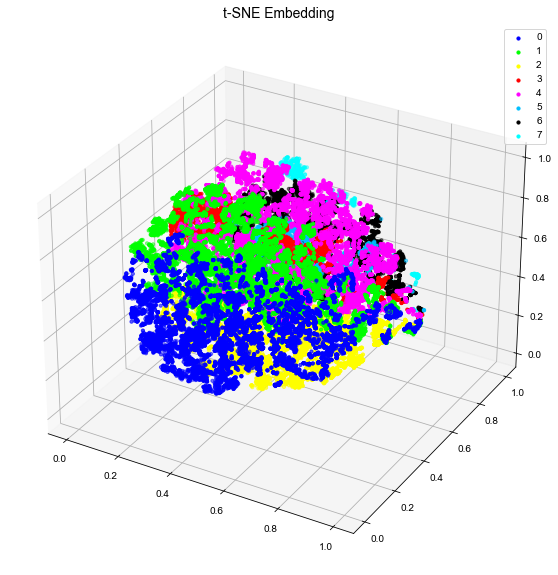

In [166]:
result, label, n_samples, n_features,tsne = Train(data_2020,feature1_cat +feature2_num + clus)
fig = PlotEmbedding(result, label, n_samples)
plt.show()

In [168]:
#data_2020.to_csv('/Users/jiangshihua/Desktop/2020_200_8.csv')

#### 图表、词云

In [2]:
#data_2020 = pd.read_csv('/Users/jiangshihua/Desktop/2020_200.csv',index_col=0)

/var/folders/b9/cbcfk7cn21jgh4rpfnygpcmh0000gn/T/ipykernel_28090/767150377.py:1: DtypeWarning: Columns (22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2020 = pd.read_csv('/Users/jiangshihua/Desktop/2020_200.csv',index_col=0)


In [85]:
def Plot_bar_age(data, data_label,roi_result_list):
    #data_list = list(data[data_label])

    x_label = list(data[data_label].unique())
    
    x_number = [0]*len(x_label)

#     for i in range(len(data)):
#         for k in range(len(x_label)):
#             if data[data_label][i] == x_label[k]:
#                 x_number[k] += 1
    for j in data[data_label]:
        for k in range(len(x_label)):
            if j==x_label[k]:
                x_number[k]+=1
            
        
    fig = plt.figure(figsize=(15, 10), dpi=80)
    
    x_arange = np.arange(len(x_label))  # [0 1 2 3 4 5]，相当于x轴上的坐标序列

    bar_width = 0.35  # 一个bar的宽度，注意x轴每两项的刻度的间距为1，注意合理设置宽度


    """
    绘制条形图，各入参的含义：
    x_arange - bar_width / 2：第一个bar在x轴上的中心值，每个刻度值减一半bar宽度得到，第二个bar则是加一半bar宽度；
    scores_zhangsan：bar高度，这里也就是分数值；
    bar_width：bar宽度；
    label：标签
    """
    plt.bar(x_arange - bar_width / 2, x_number, bar_width, label=x_label)
    #plt.bar(range(len(num_list)), num_list1, bottom=num_list, label='girl',tick_label = name_list,fc = 'r')

    # 在各个bar上标注数值，使用zip()来同步遍历x_arange, scores_zhangsan, scores_lisi
    for x, x_number in zip(x_arange, x_number):

        plt.text(x - bar_width / 2, x_number + 1, x_number, ha='center', fontsize=12)

    plt.xlabel(data_label)
    plt.ylabel("频数")
    #plt.xticks(x_arange, labels=x_label)  # x轴上的刻度用courses的项来绘制
    plt.xticks([index - bar_width/2 for index in x_arange], labels=x_label)#, rotation = 45)
    plt.title(roi_result_list)
    #plt.legend()
    #plt.show()
    #plt.tight_layout()
    return fig


def Plot_label_age(data,data_label,cluster_label):
    roi_list = [0,1,2,3,4,5,6]
    roi_result_list = ['0','1','2','3','4','5','6']
#     roi_list = list(data[cluster_label].unique())
#     roi_result_list = []
#     for i in data[cluster_label].unique():
#         roi_result_list.append(str(i))
    for i in roi_list:
        data_roi = data[data[cluster_label].isin([i])]
        #print(i)
        fig = Plot_bar_age(data_roi, data_label,roi_result_list[i])

        plt.show()
        plt.tight_layout()


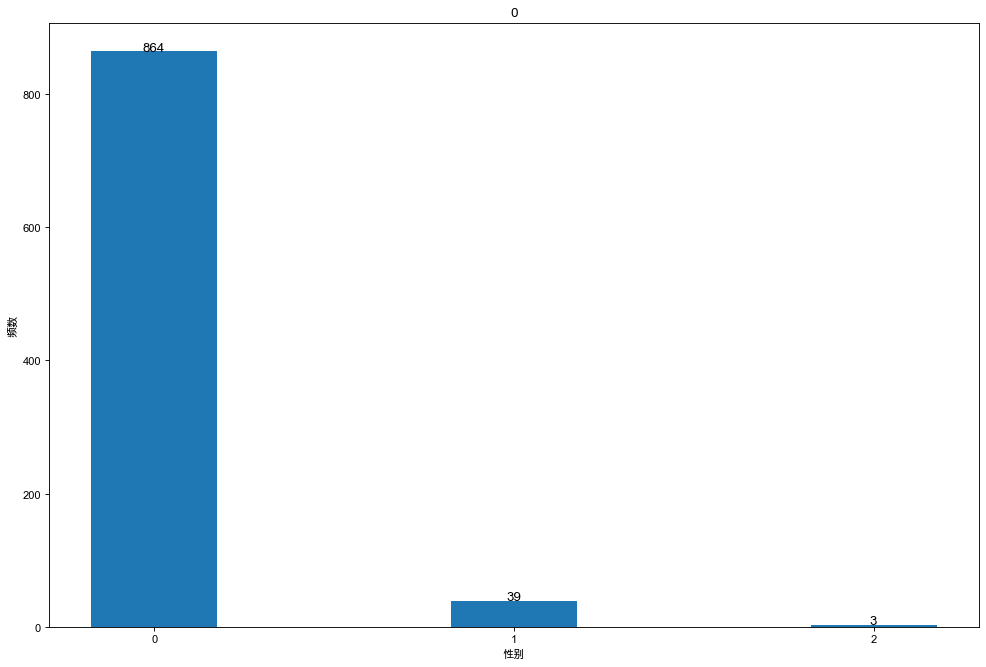

<Figure size 432x288 with 0 Axes>

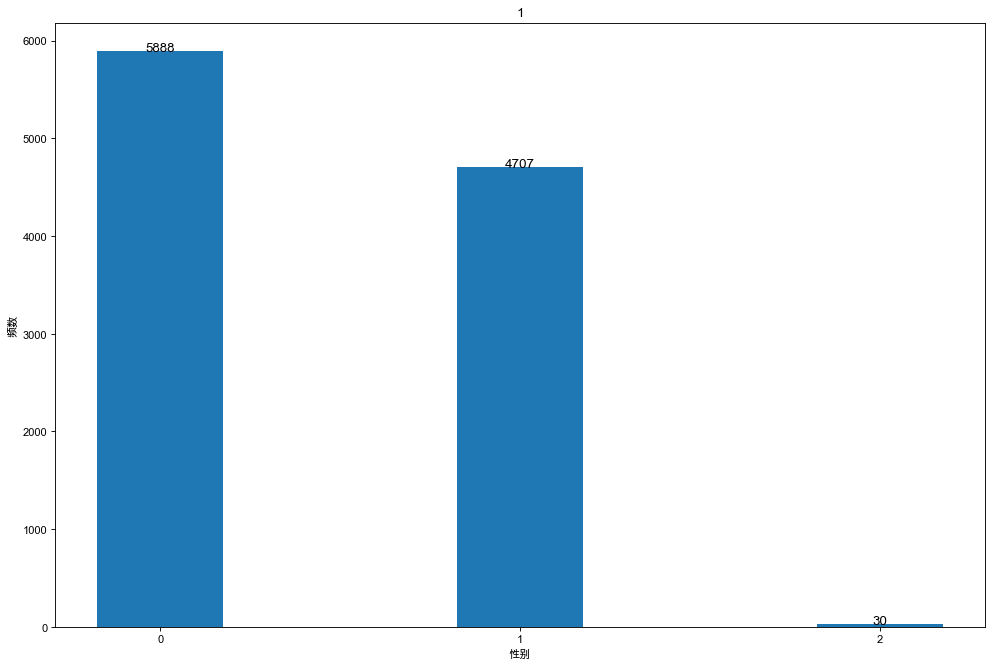

<Figure size 432x288 with 0 Axes>

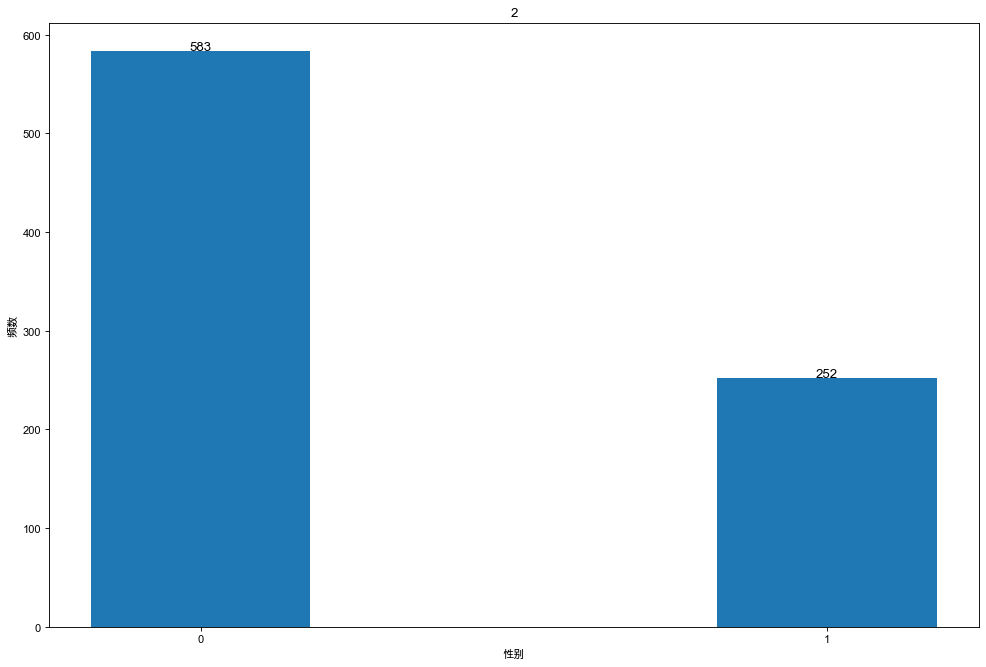

<Figure size 432x288 with 0 Axes>

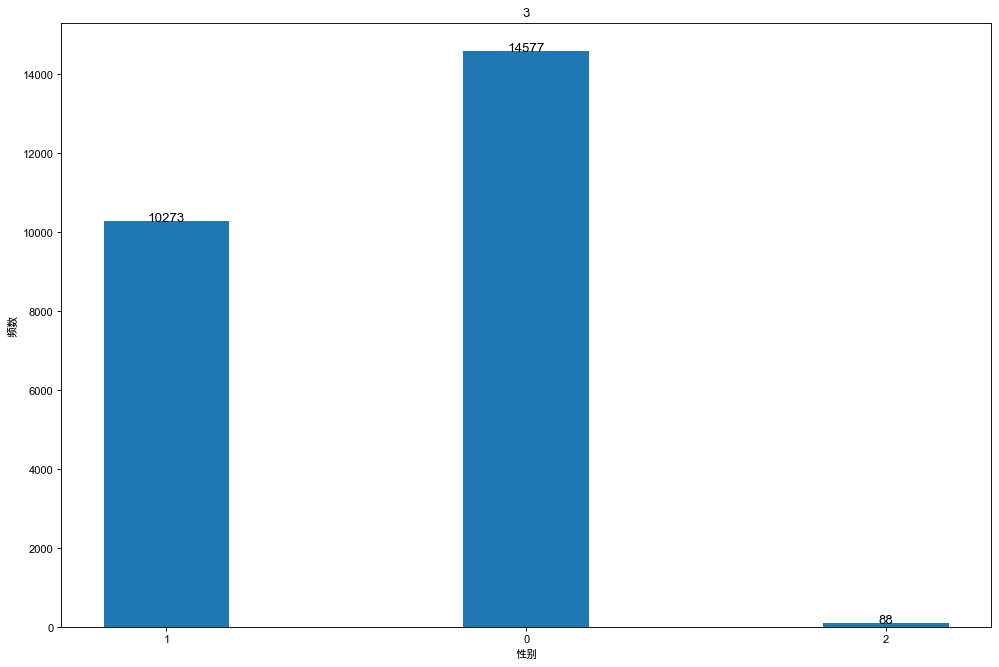

<Figure size 432x288 with 0 Axes>

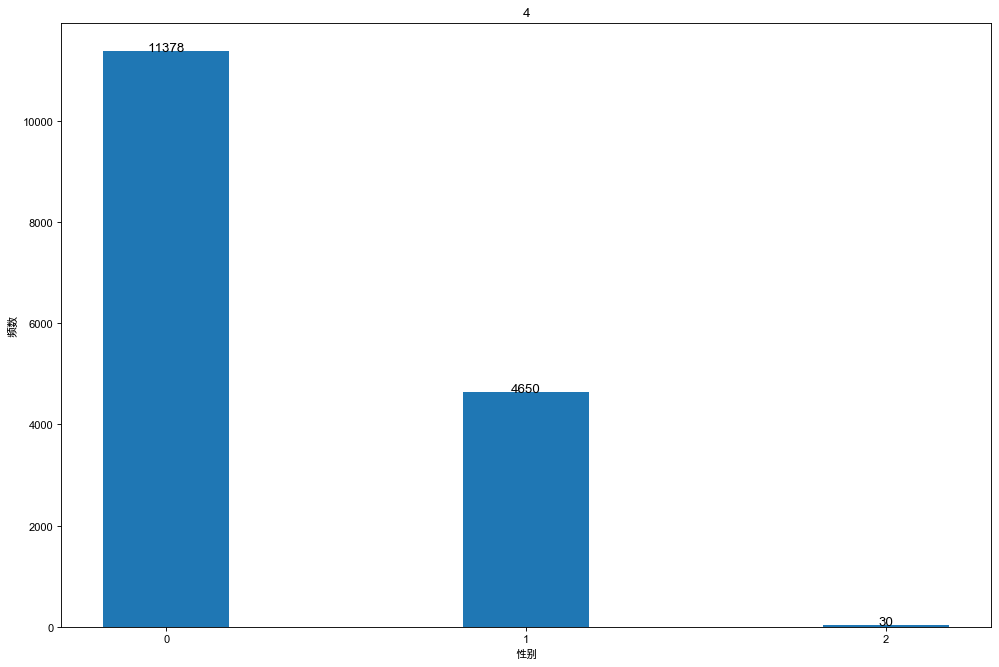

<Figure size 432x288 with 0 Axes>

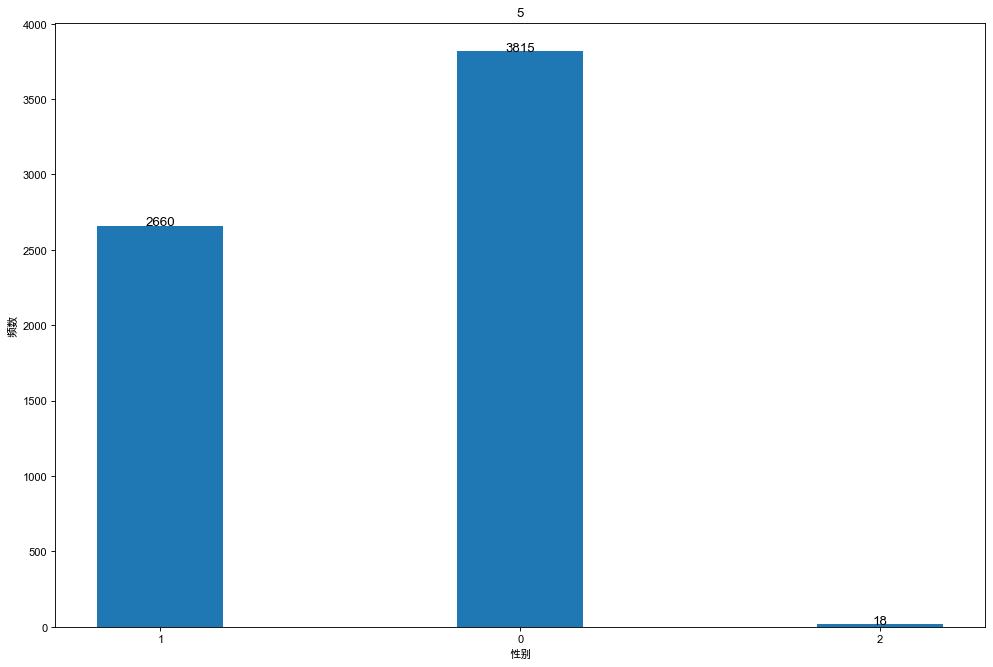

<Figure size 432x288 with 0 Axes>

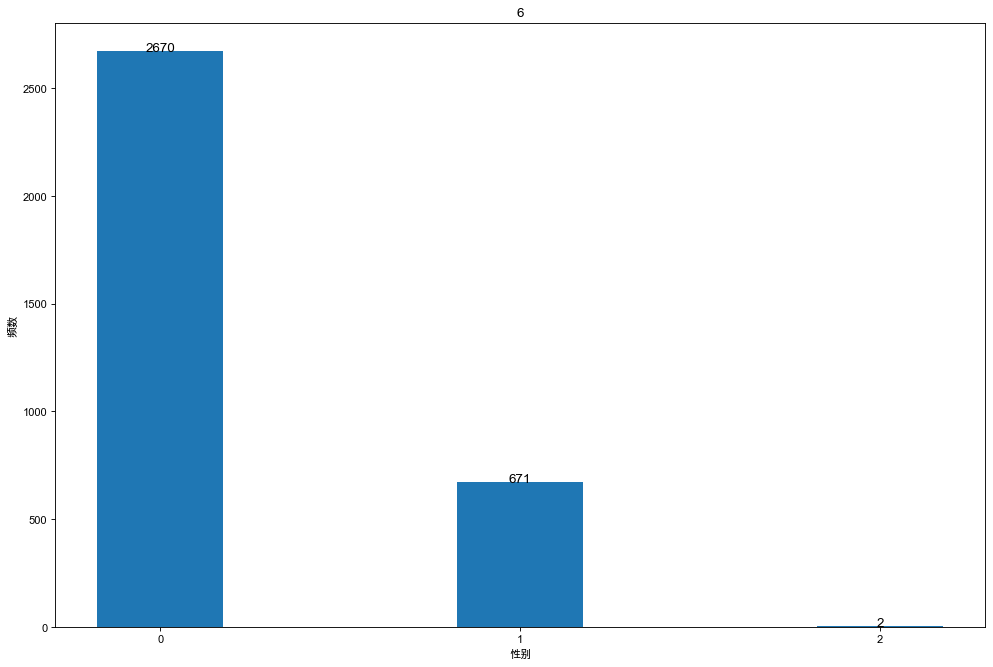

<Figure size 432x288 with 0 Axes>

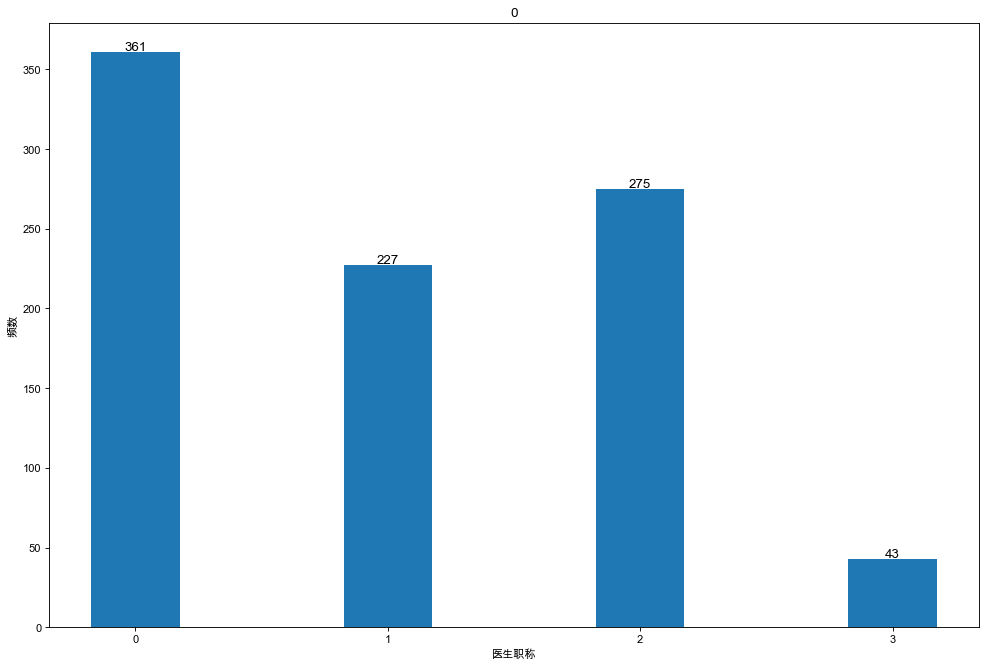

<Figure size 432x288 with 0 Axes>

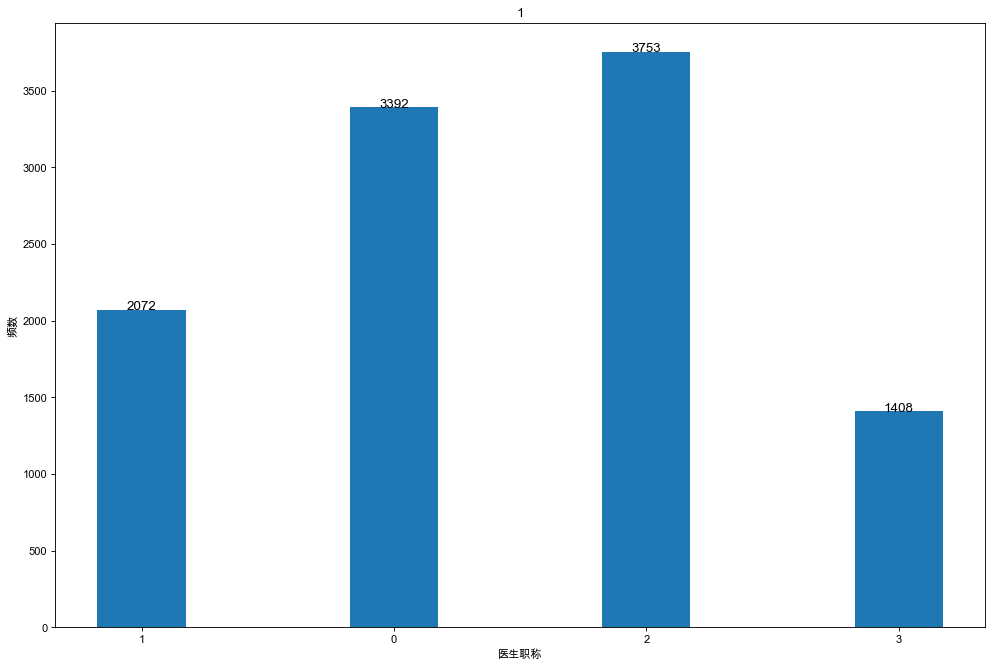

<Figure size 432x288 with 0 Axes>

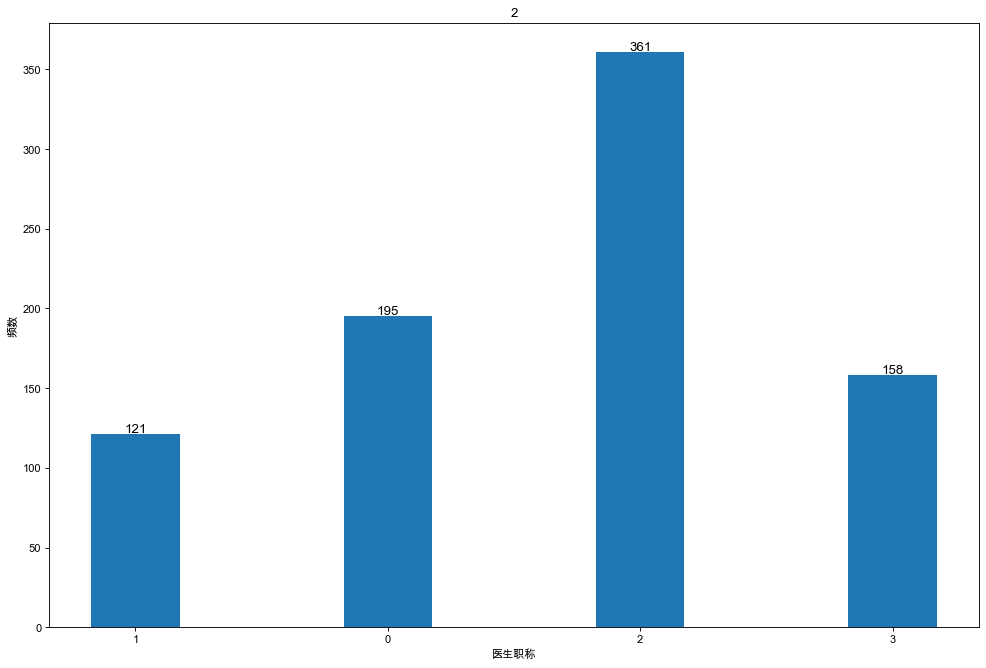

<Figure size 432x288 with 0 Axes>

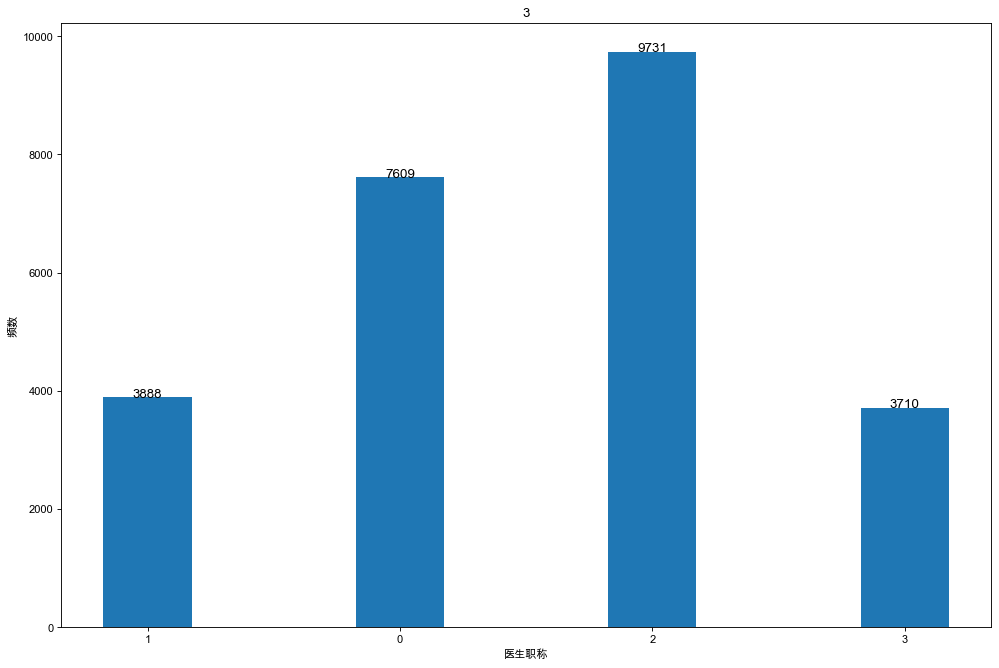

<Figure size 432x288 with 0 Axes>

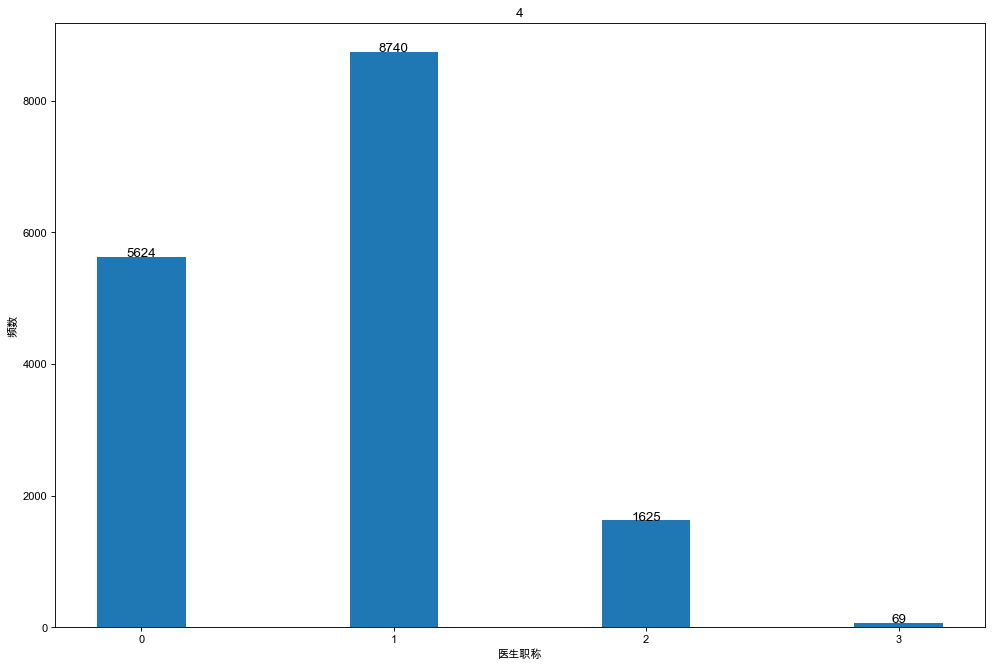

<Figure size 432x288 with 0 Axes>

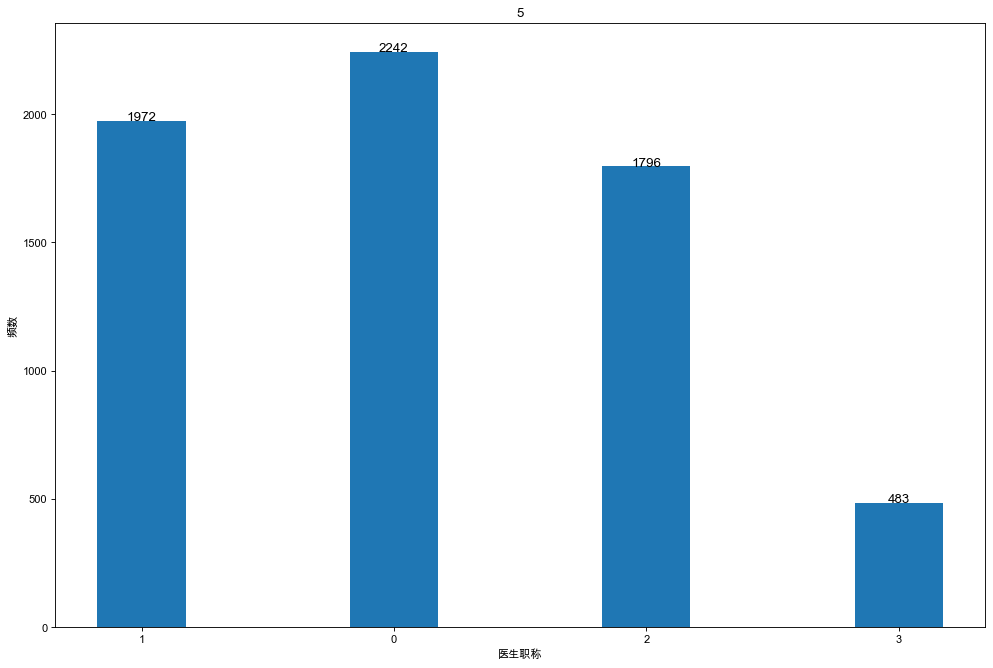

<Figure size 432x288 with 0 Axes>

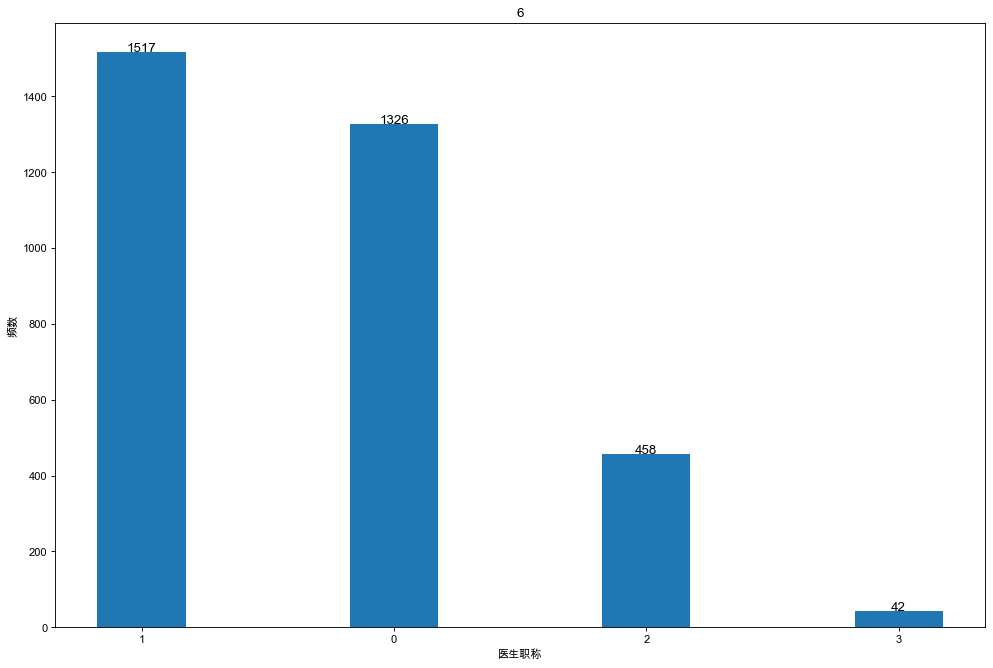

<Figure size 432x288 with 0 Axes>

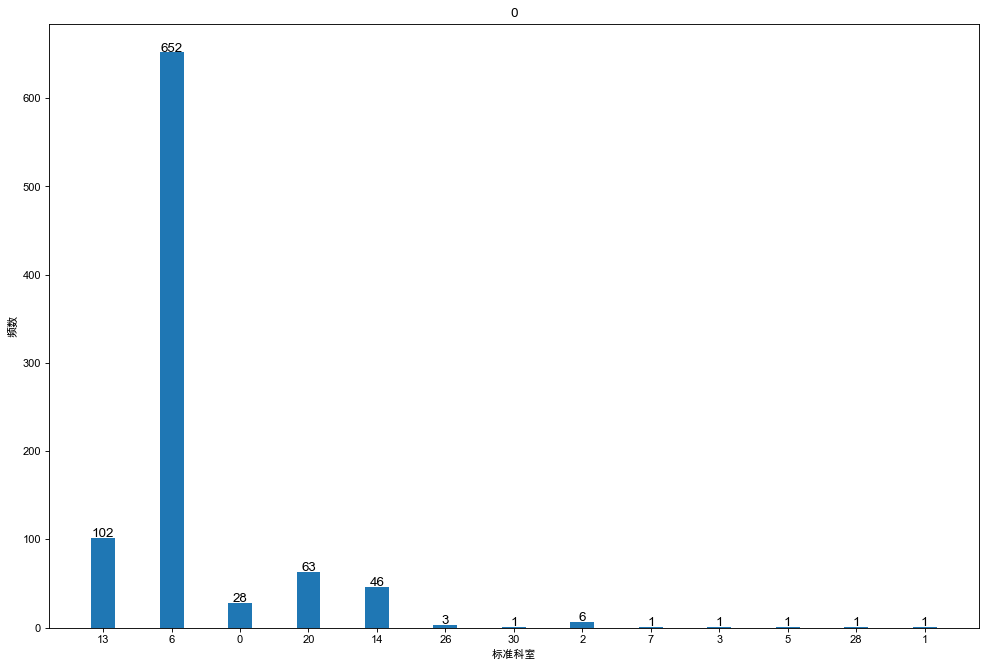

<Figure size 432x288 with 0 Axes>

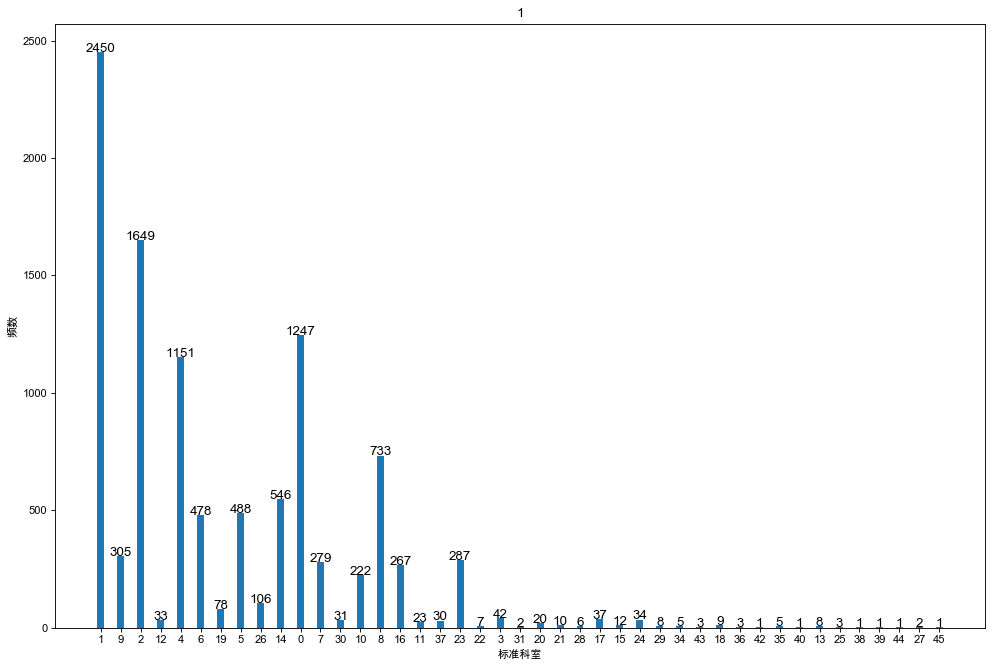

<Figure size 432x288 with 0 Axes>

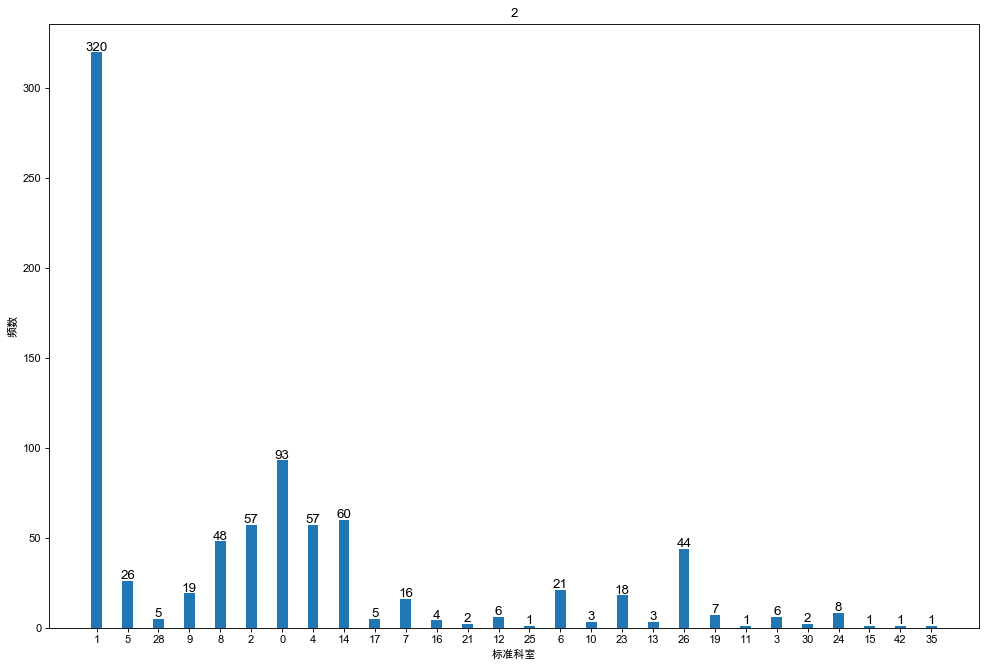

<Figure size 432x288 with 0 Axes>

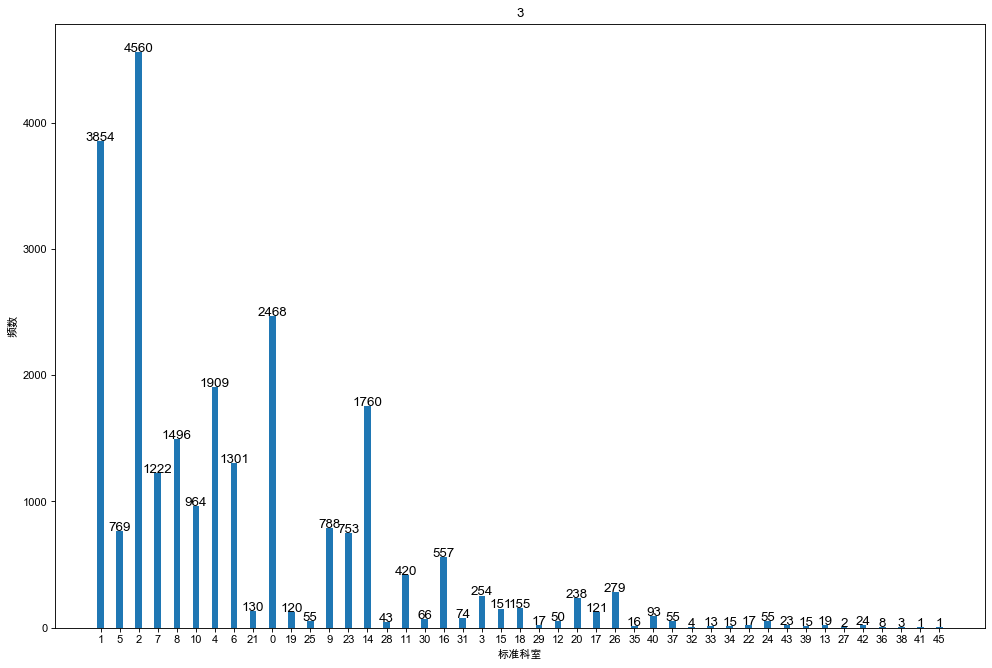

<Figure size 432x288 with 0 Axes>

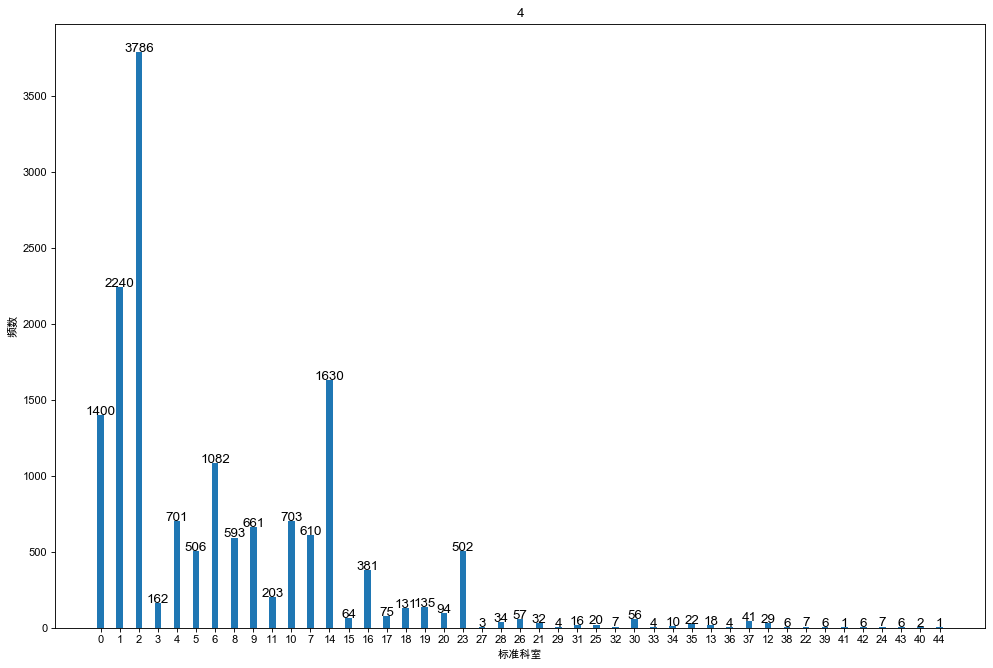

<Figure size 432x288 with 0 Axes>

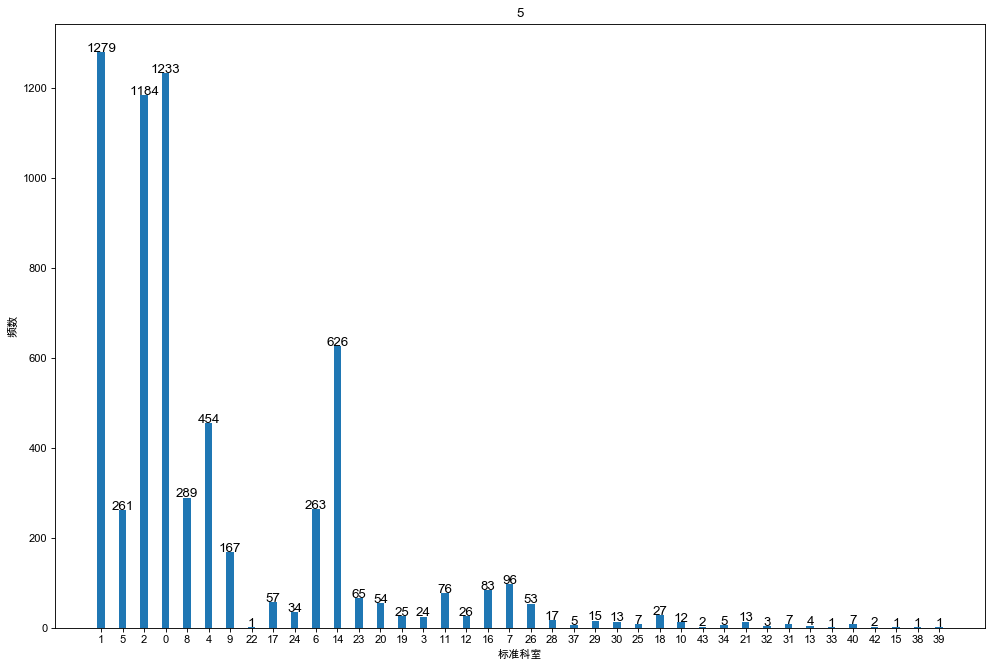

<Figure size 432x288 with 0 Axes>

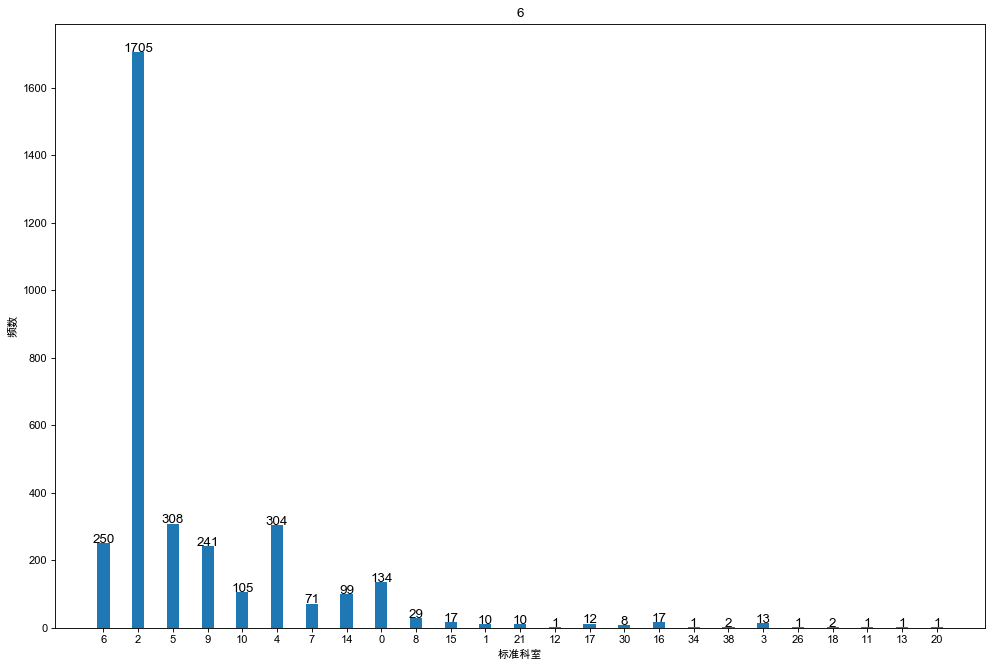

<Figure size 432x288 with 0 Axes>

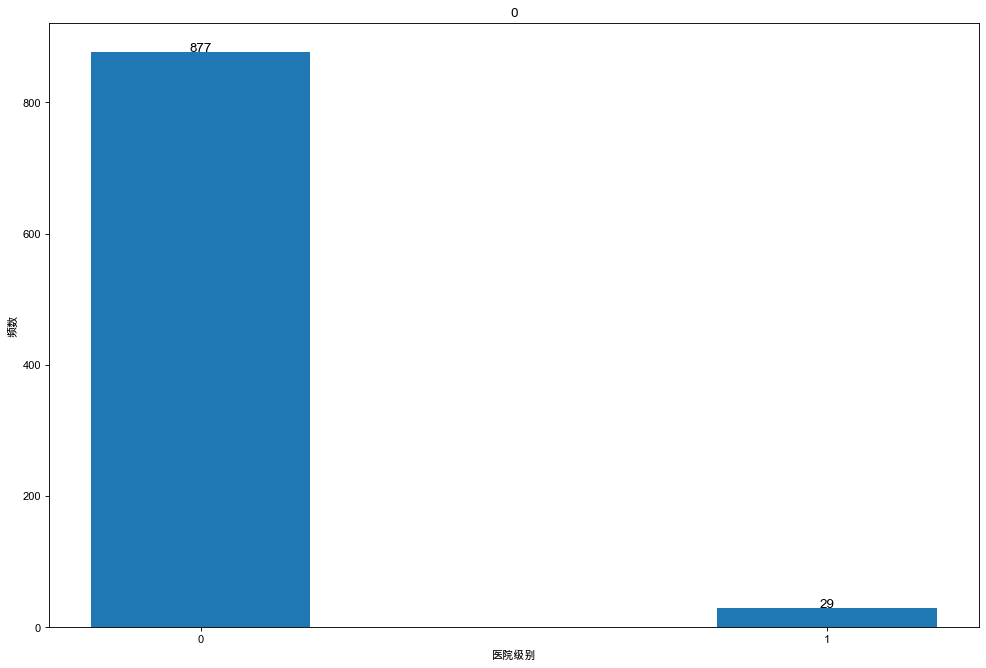

<Figure size 432x288 with 0 Axes>

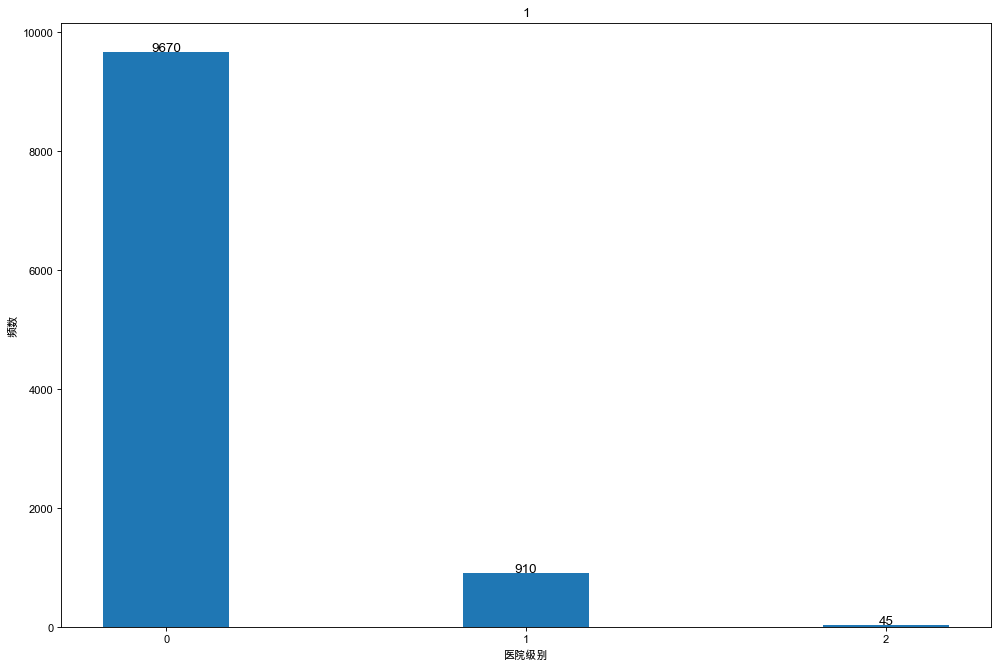

<Figure size 432x288 with 0 Axes>

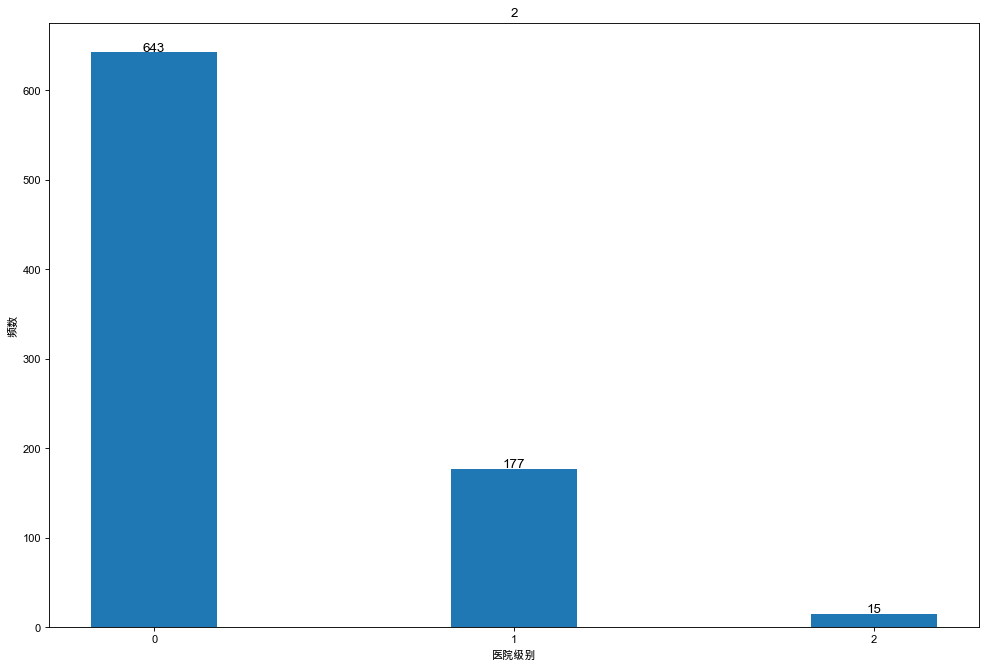

<Figure size 432x288 with 0 Axes>

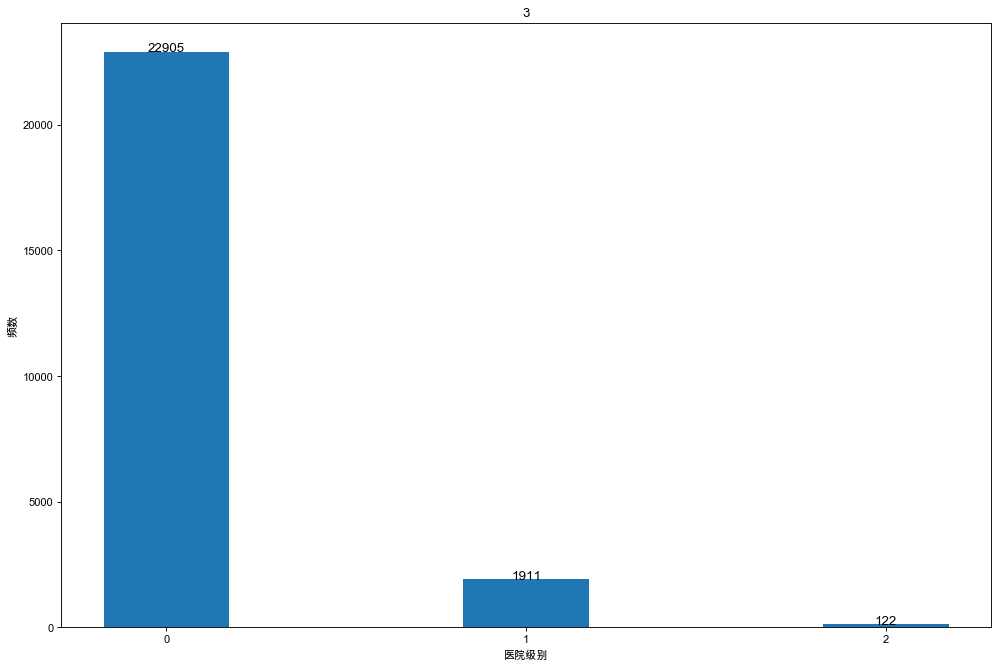

<Figure size 432x288 with 0 Axes>

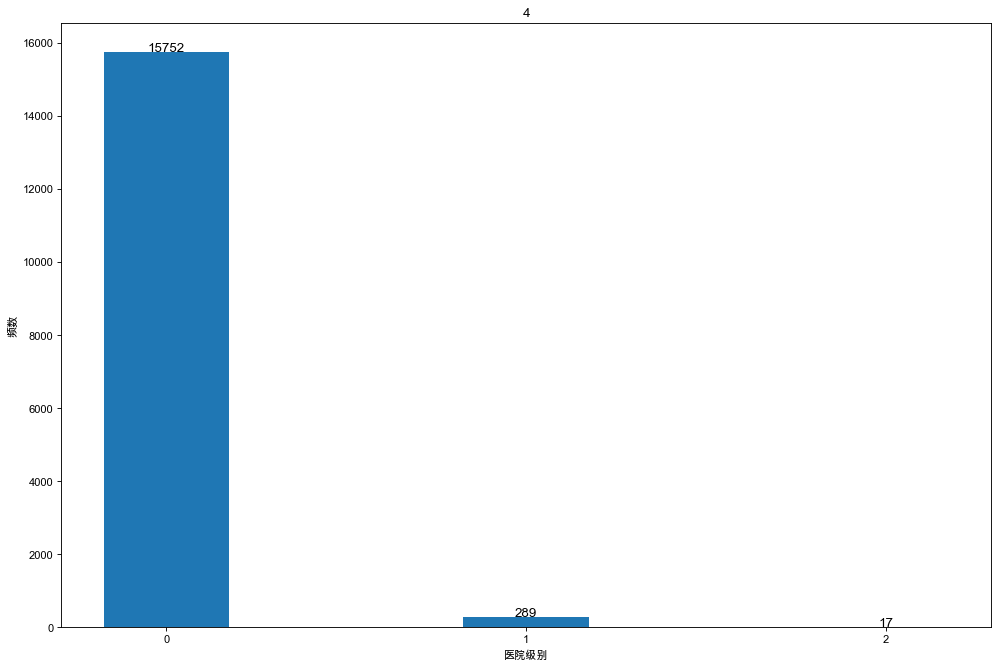

<Figure size 432x288 with 0 Axes>

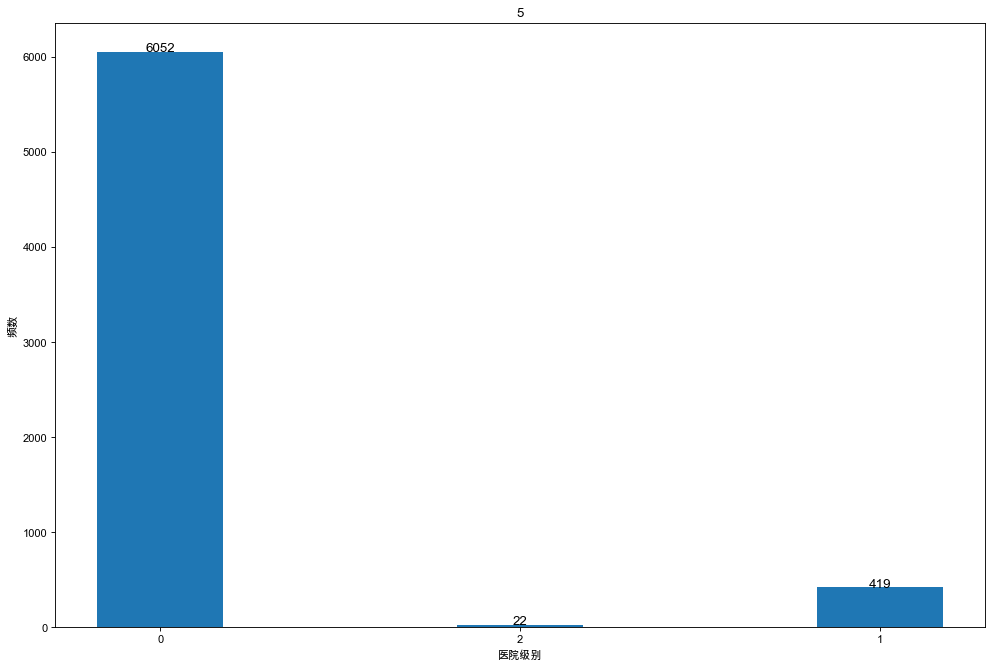

<Figure size 432x288 with 0 Axes>

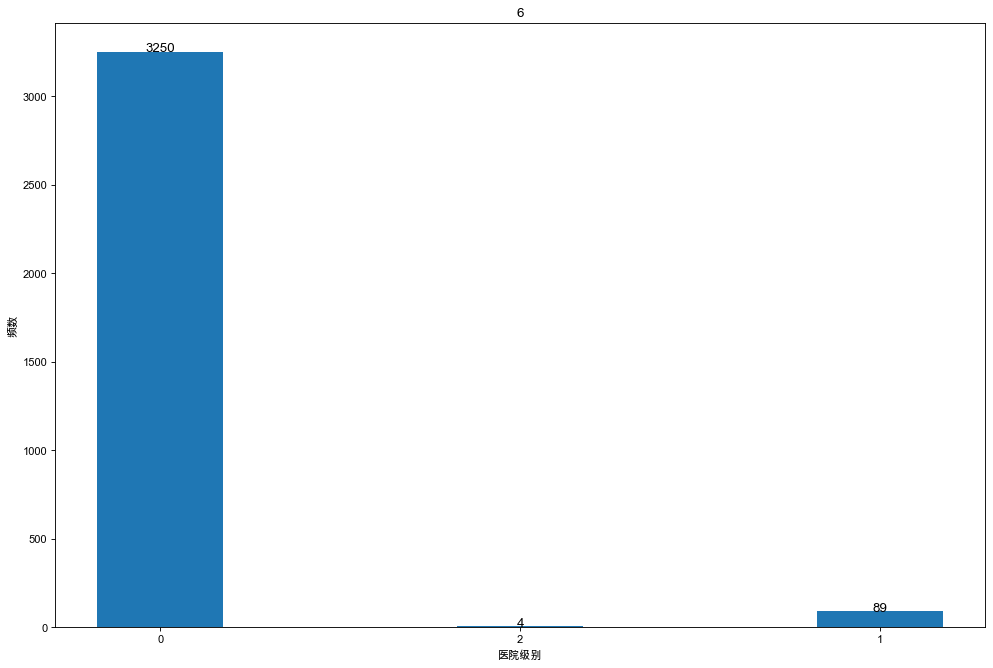

<Figure size 432x288 with 0 Axes>

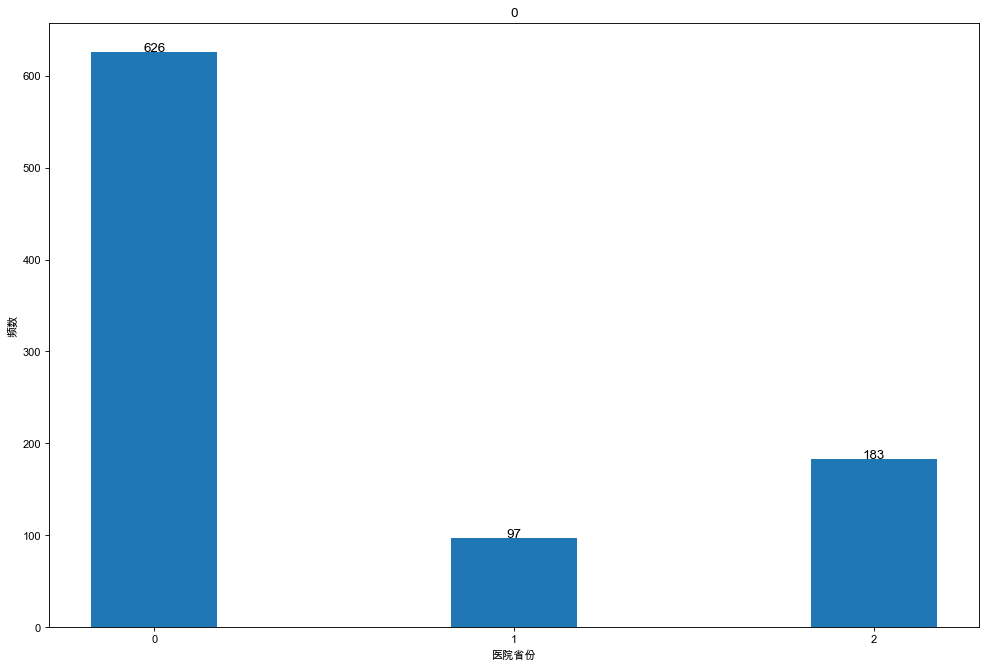

<Figure size 432x288 with 0 Axes>

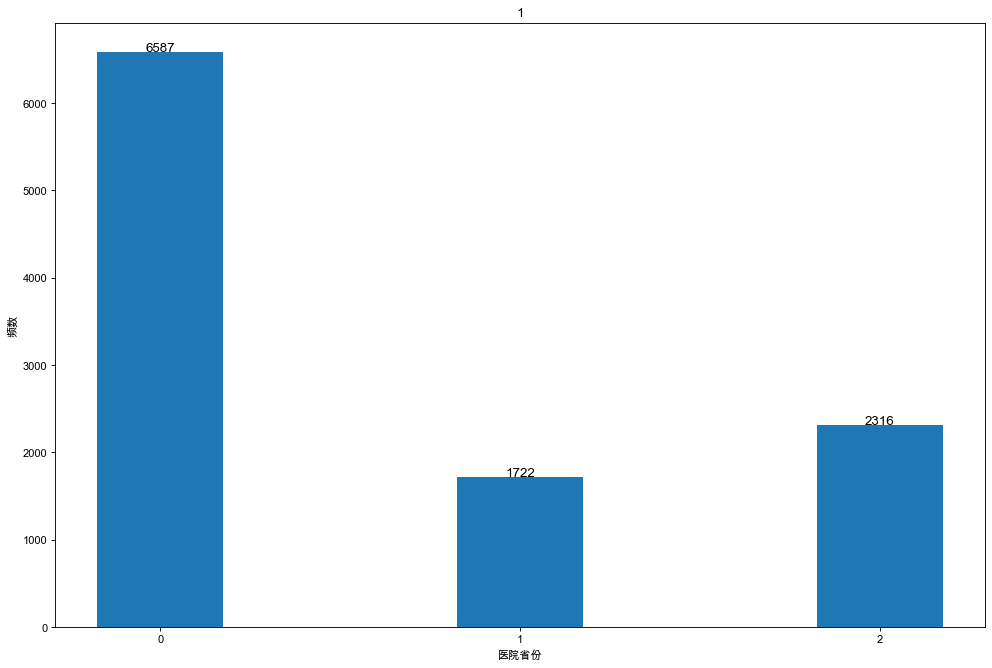

<Figure size 432x288 with 0 Axes>

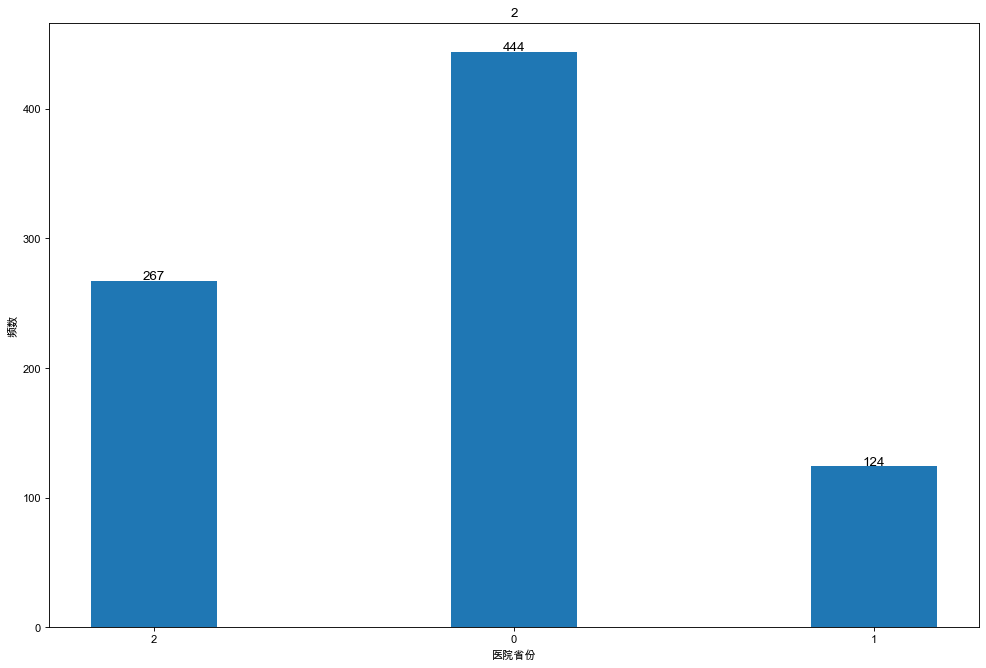

<Figure size 432x288 with 0 Axes>

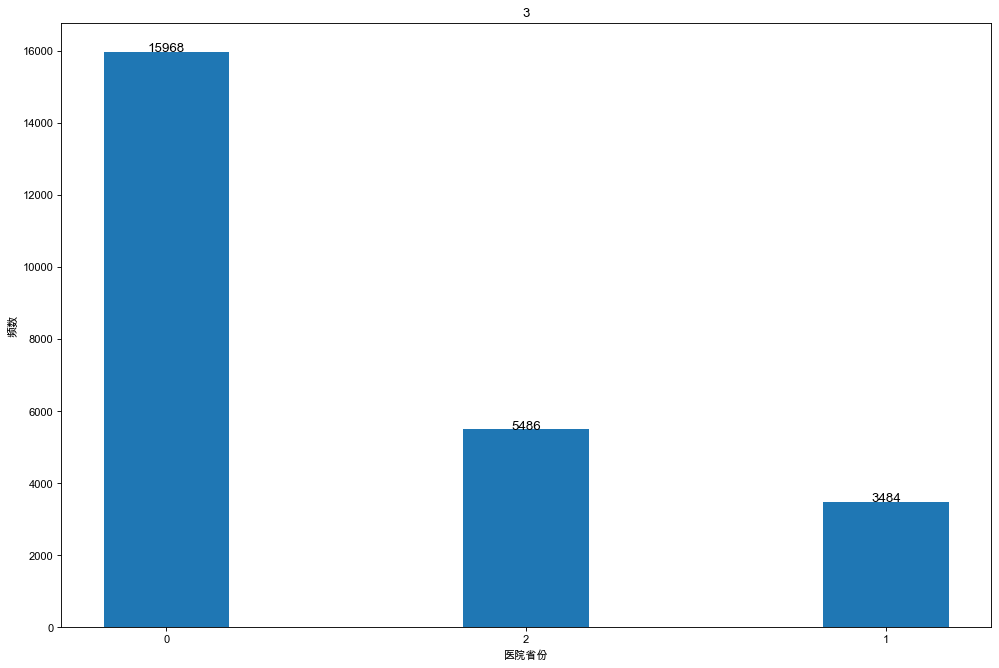

<Figure size 432x288 with 0 Axes>

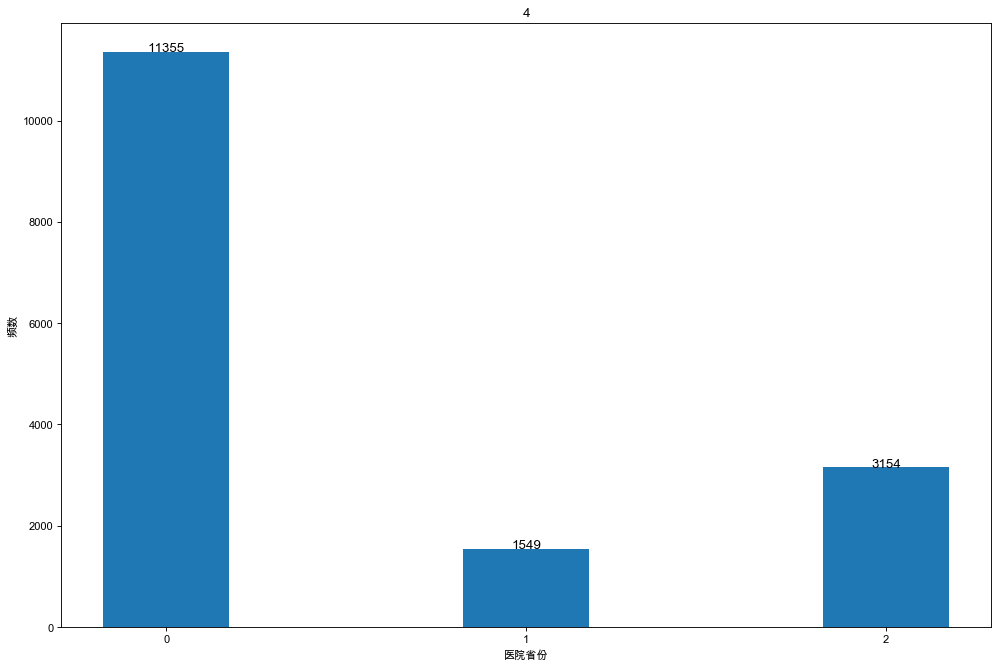

<Figure size 432x288 with 0 Axes>

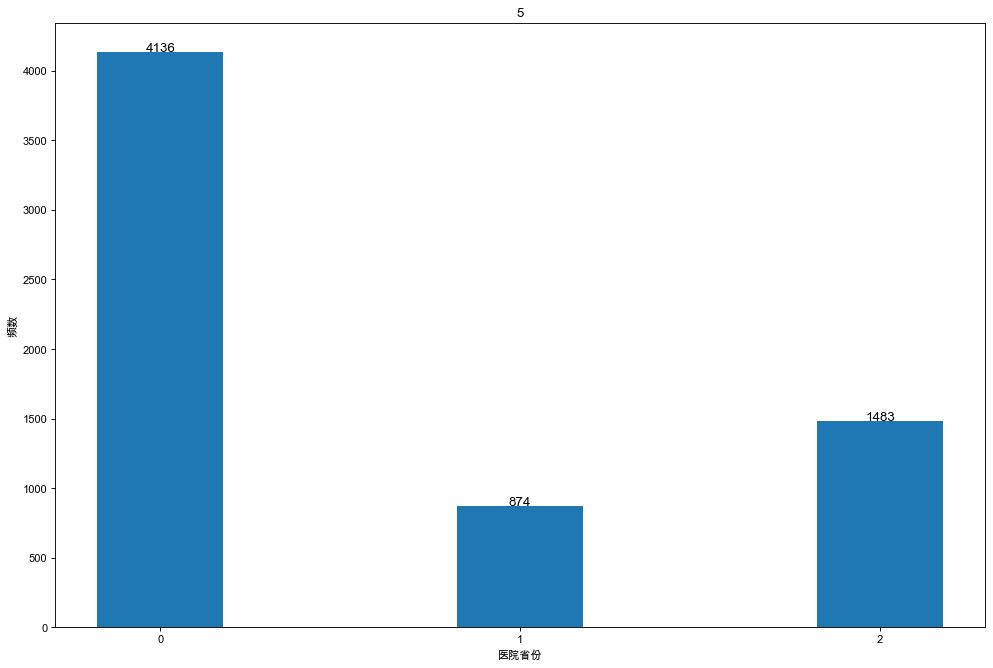

<Figure size 432x288 with 0 Axes>

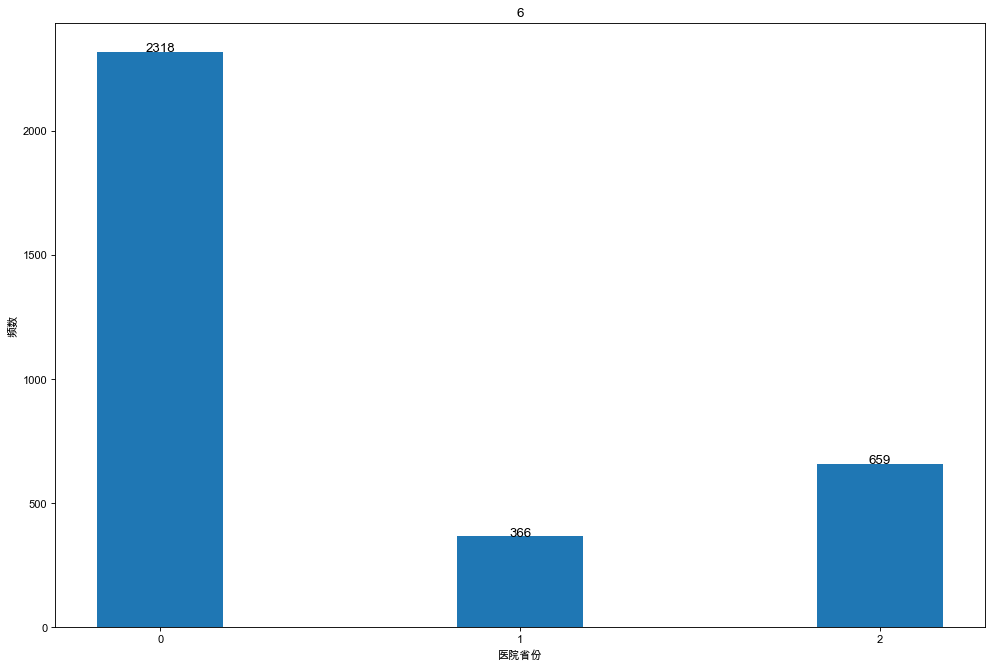

<Figure size 432x288 with 0 Axes>

In [86]:
for i in feature1_cat:
    Plot_label_age(data_2020,i,'聚类结果')

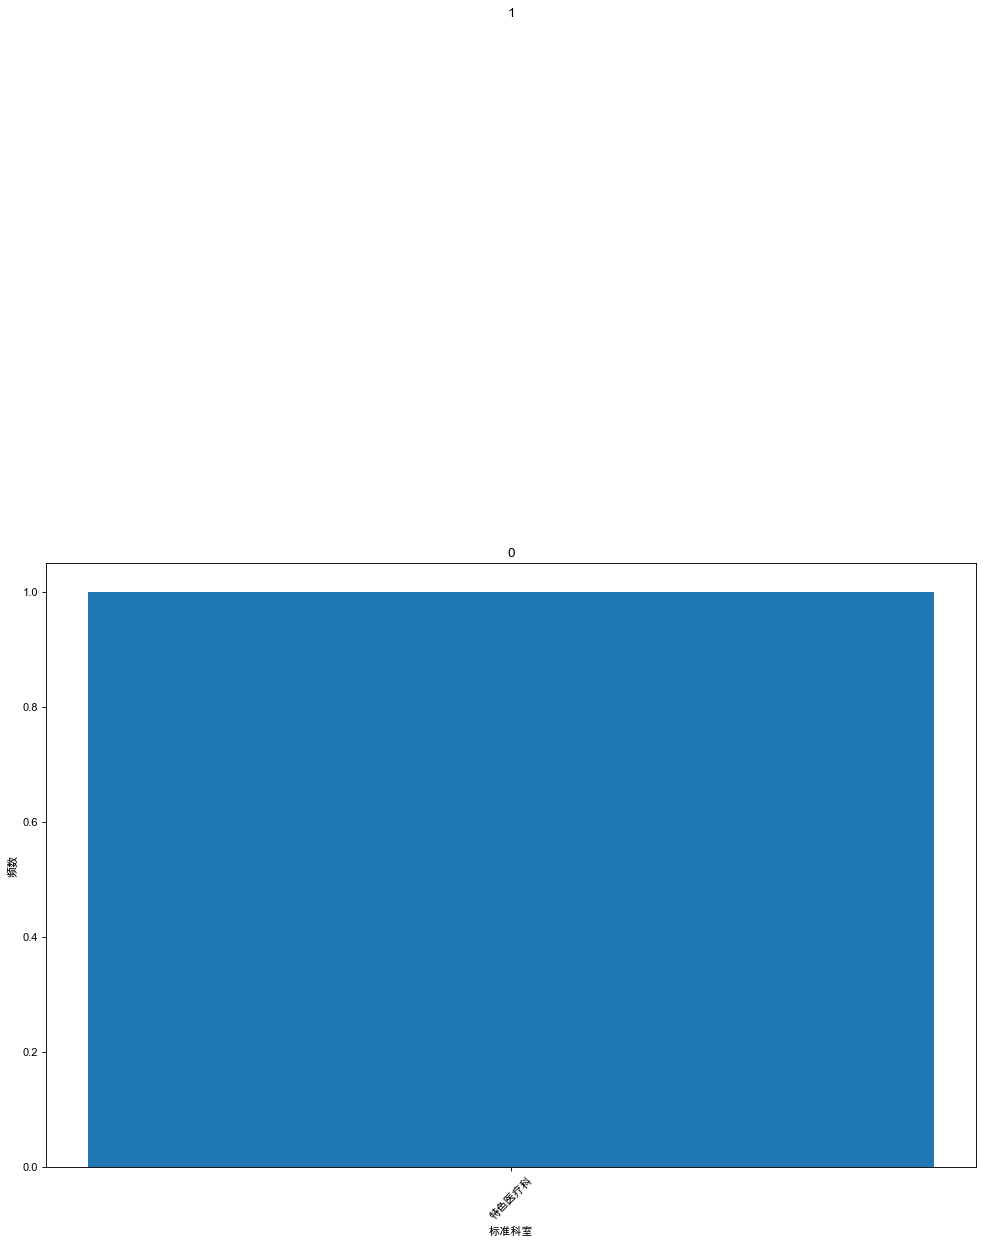

<Figure size 432x288 with 0 Axes>

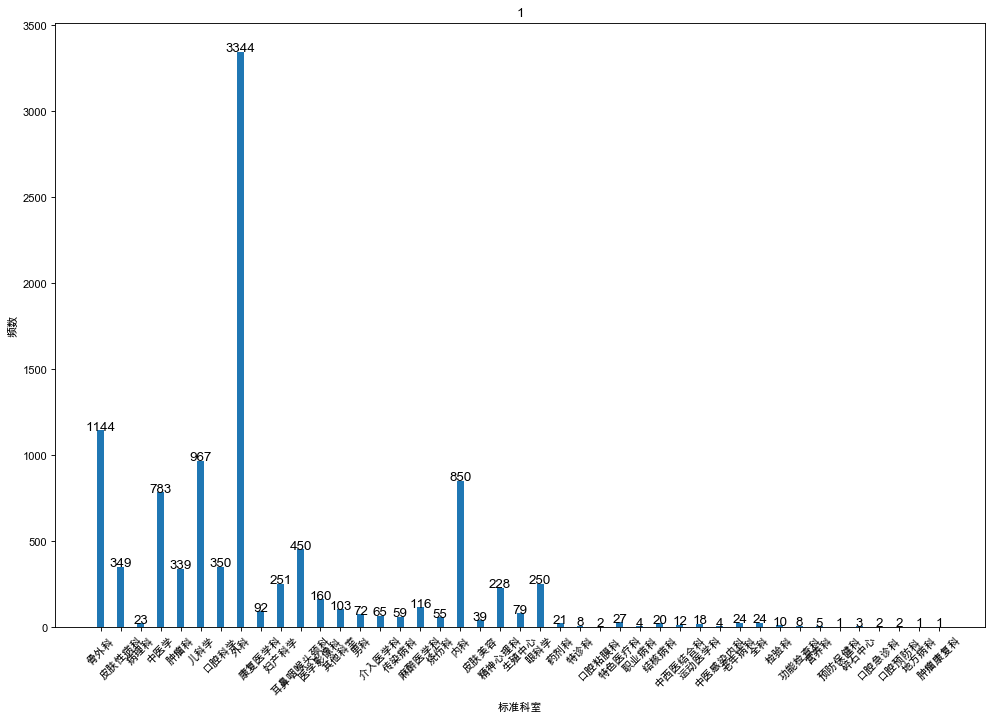

<Figure size 432x288 with 0 Axes>

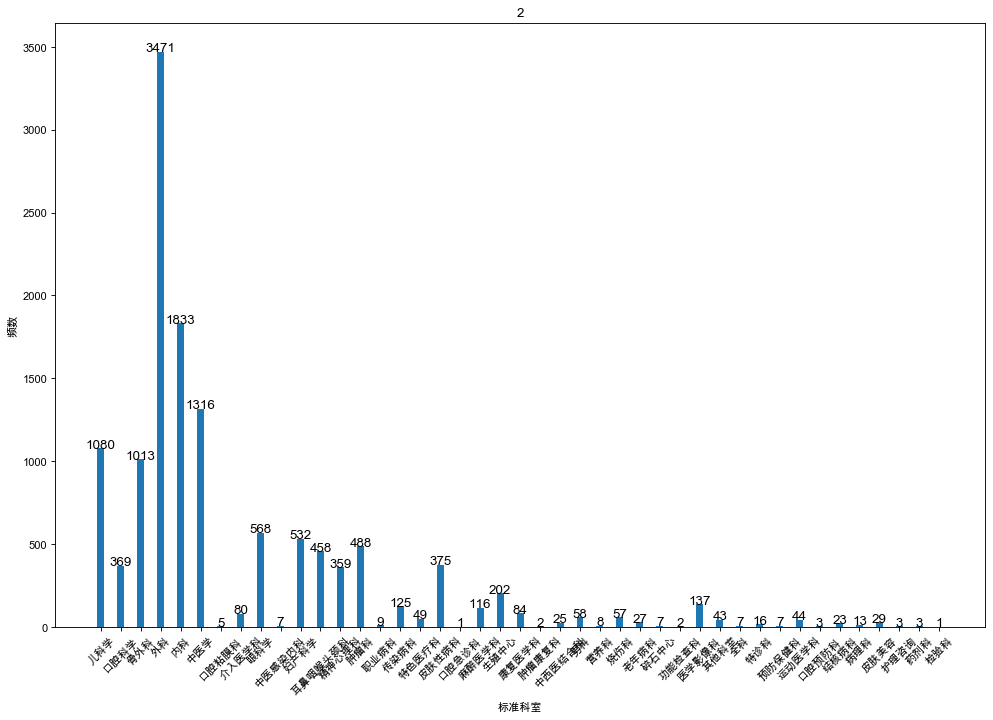

<Figure size 432x288 with 0 Axes>

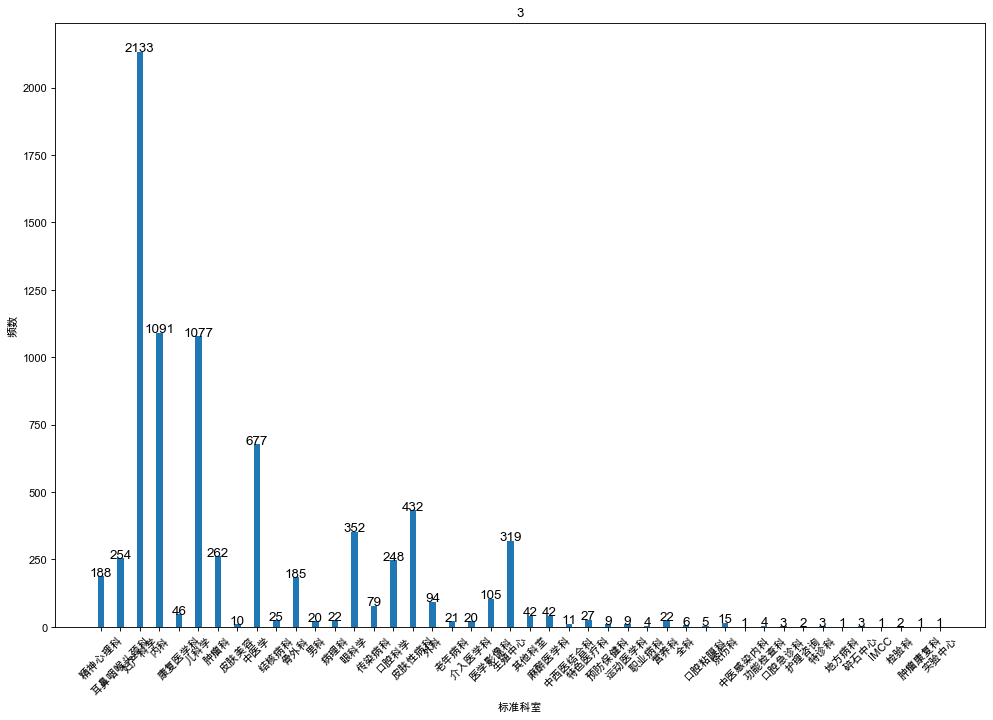

<Figure size 432x288 with 0 Axes>

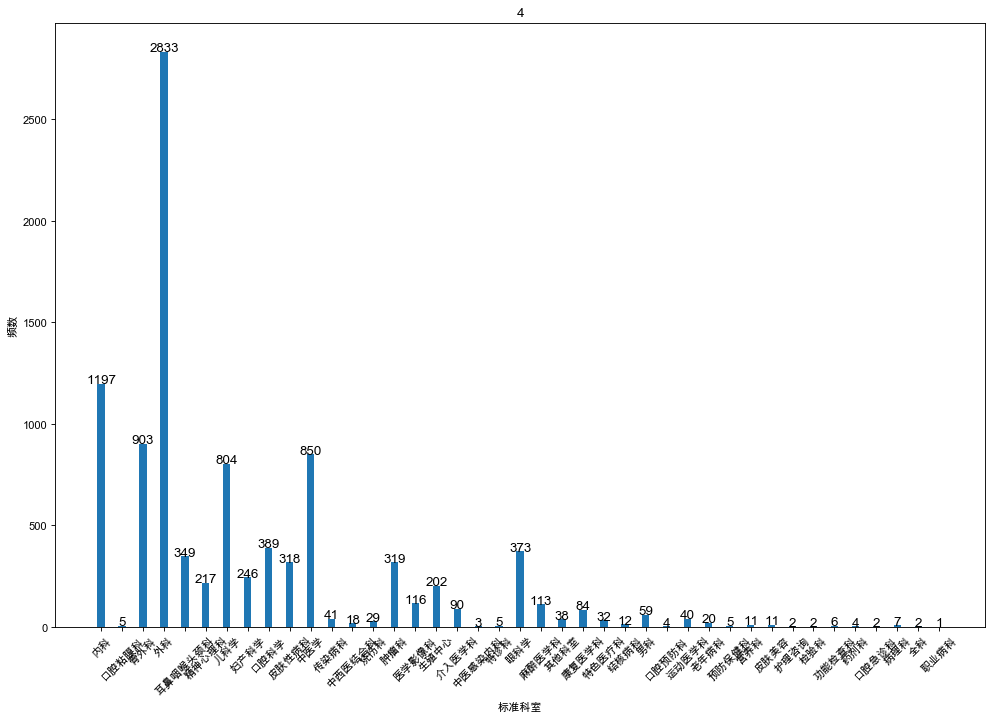

<Figure size 432x288 with 0 Axes>

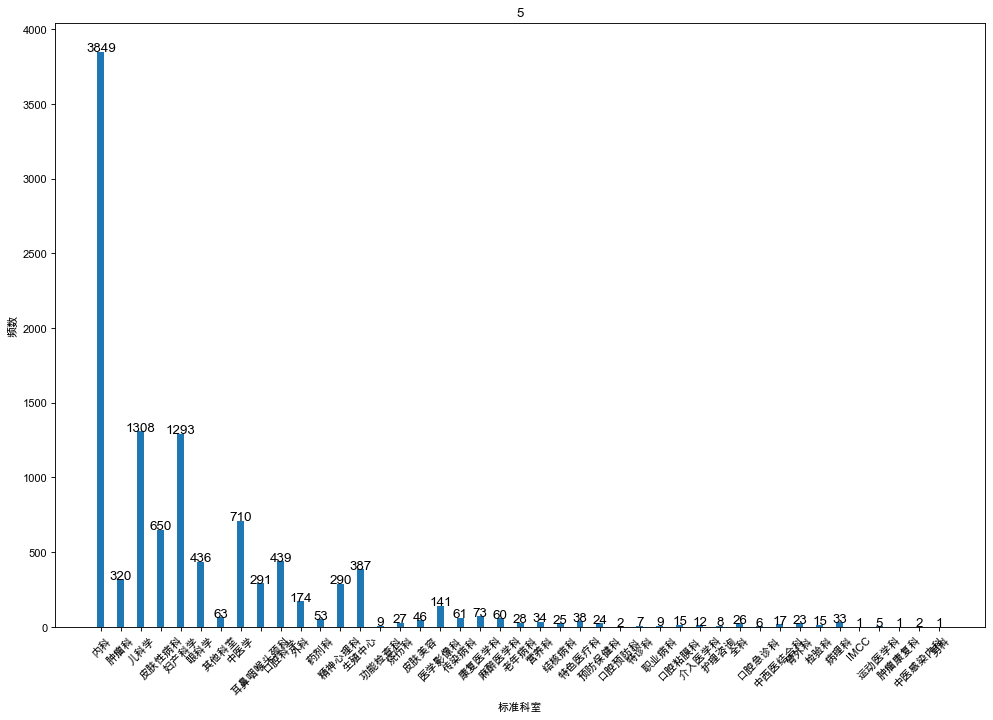

<Figure size 432x288 with 0 Axes>

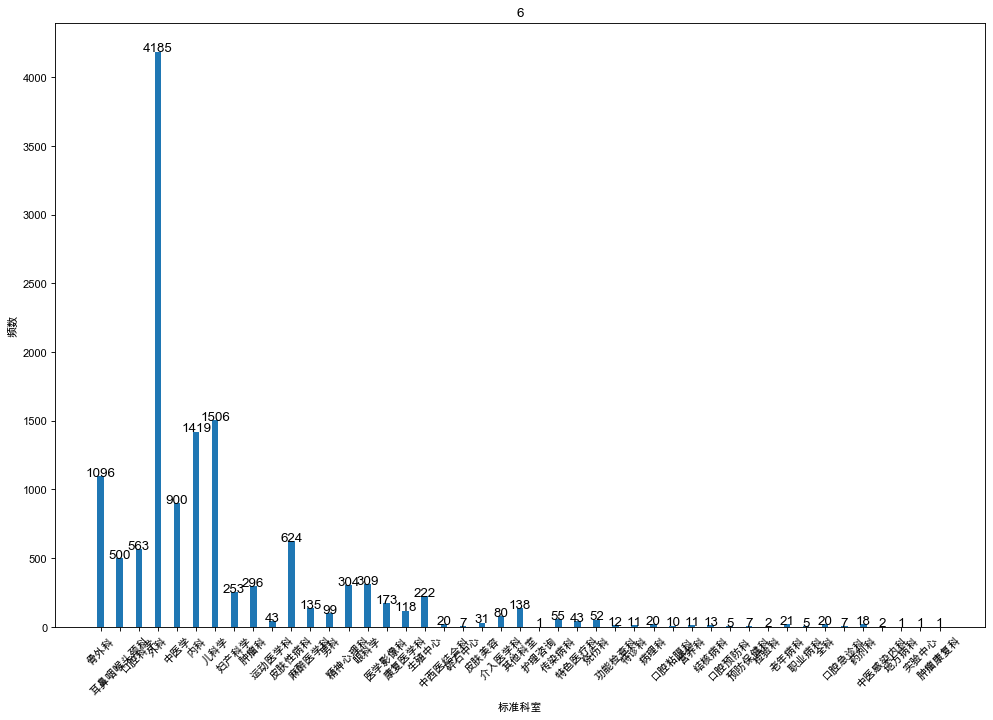

<Figure size 432x288 with 0 Axes>

In [215]:
Plot_label_age(data_2020,'标准科室','聚类结果')

In [124]:
def Plot_bar_age(data, data_label,roi_result_list):
    b=data[data_label].value_counts(bins=5,sort=False)           #分成五个区间

    x=b.index
    print(x)
    y=list(b)

    plt.bar(range(len(y)),y,width=0.4,color='c',tick_label=x)
    plt.xlabel(data_label,fontsize=14)
    plt.ylabel('频数',fontsize=14)
    plt.title(roi_result_list)
    plt.show()
    return fig


def Plot_label_age(data,data_label,cluster_label):
#     roi_list = [0,1,3,4,5,6]
#     roi_result_list = ['0','1','3','4','5','6']
#     roi_list = [0,1]
#     roi_result_list = ['0','1']
    roi_list = list(np.sort(data[cluster_label].unique()))
    roi_list = np.array(roi_list).astype(dtype=int).tolist()
    roi_result_list=[str(x) for x in roi_list]

#     roi_list = list(data[cluster_label].unique())
#     roi_result_list = []
#     for i in data[cluster_label].unique():
#         roi_result_list.append(str(i))
    for i in roi_list:
        data_roi = data[data[cluster_label].isin([i])]
        #print(i)
        fig = Plot_bar_age(data_roi, data_label,roi_result_list[i-3])

        plt.show()
        plt.tight_layout()

IntervalIndex([(-2.6839999999999997, 938.6], (938.6, 1875.2], (1875.2, 2811.8], (2811.8, 3748.4], (3748.4, 4685.0]], dtype='interval[float64, right]')


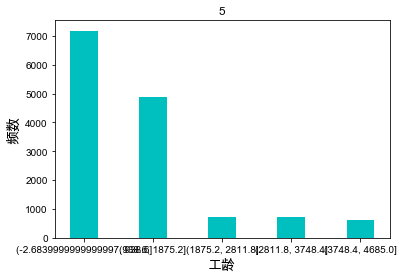

IntervalIndex([(-0.682, 940.2], (940.2, 1876.4], (1876.4, 2812.6], (2812.6, 3748.8], (3748.8, 4685.0]], dtype='interval[float64, right]')


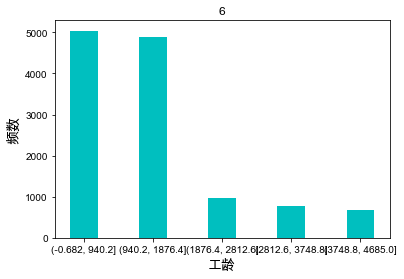

IntervalIndex([(9.328000000000001, 948.2], (948.2, 1882.4], (1882.4, 2816.6], (2816.6, 3750.8], (3750.8, 4685.0]], dtype='interval[float64, right]')


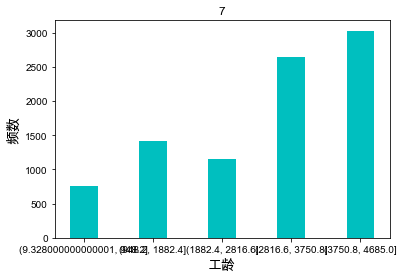

IntervalIndex([(10.329, 949.0], (949.0, 1883.0], (1883.0, 2817.0], (2817.0, 3751.0], (3751.0, 4685.0]], dtype='interval[float64, right]')


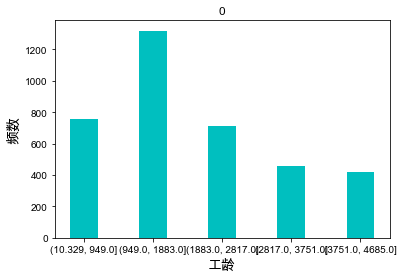

IntervalIndex([(-3.685, 937.8], (937.8, 1874.6], (1874.6, 2811.4], (2811.4, 3748.2], (3748.2, 4685.0]], dtype='interval[float64, right]')


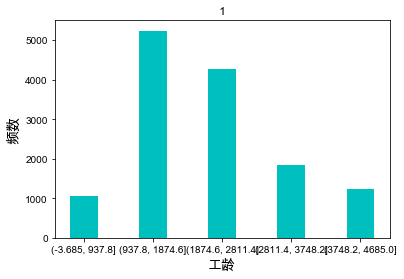

IntervalIndex([(23.342, 959.4], (959.4, 1890.8], (1890.8, 2822.2], (2822.2, 3753.6], (3753.6, 4685.0]], dtype='interval[float64, right]')


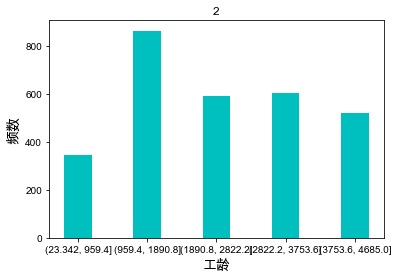

IntervalIndex([(-3.685, 937.8], (937.8, 1874.6], (1874.6, 2811.4], (2811.4, 3748.2], (3748.2, 4685.0]], dtype='interval[float64, right]')


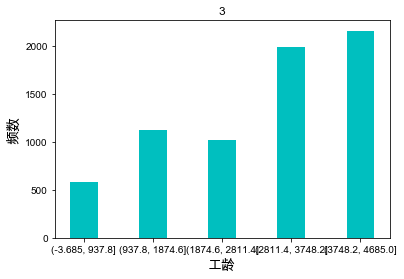

IntervalIndex([(16.404, 940.0], (940.0, 1859.0], (1859.0, 2778.0], (2778.0, 3697.0], (3697.0, 4616.0]], dtype='interval[float64, right]')


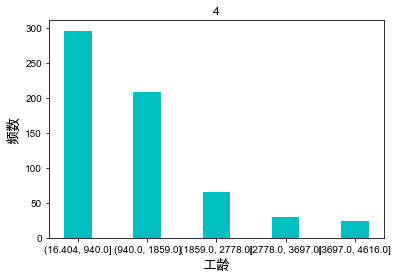

<Figure size 432x288 with 0 Axes>

In [188]:
Plot_label_age(data_2020,'工龄','聚类结果')

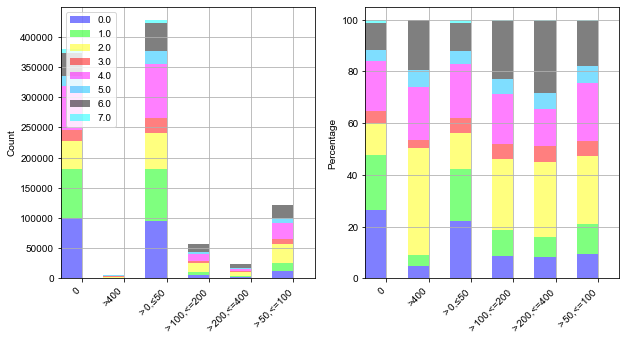

In [190]:
money_columns = ['0','>400','＞0,≤50','＞100,<=200','＞200,<=400','＞50,<=100']
clus = ['聚类结果']
type1_list =list(data_2020[money_columns+clus].groupby(['聚类结果']).sum().loc[0][:])
type2_list =list(data_2020[money_columns+clus].groupby(['聚类结果']).sum().loc[1][:])
type3_list =list(data_2020[money_columns+clus].groupby(['聚类结果']).sum().loc[2][:])
type4_list =list(data_2020[money_columns+clus].groupby(['聚类结果']).sum().loc[3][:])
type5_list =list(data_2020[money_columns+clus].groupby(['聚类结果']).sum().loc[4][:])
type6_list =list(data_2020[money_columns+clus].groupby(['聚类结果']).sum().loc[5][:])
type7_list =list(data_2020[money_columns+clus].groupby(['聚类结果']).sum().loc[6][:])
type8_list =list(data_2020[money_columns+clus].groupby(['聚类结果']).sum().loc[7][:])

money_list = list(data_2020[money_columns+clus].groupby(['聚类结果']).sum().columns)
cluster_list = list(data_2020[money_columns+clus].groupby(['聚类结果']).sum().index)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
 
bar_width = 0.5
 
# positions of the left bar-boundaries
bar_l = [i+1 for i in range(len(type1_list))]
 
# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l]
 
###################
## Absolute count
###################

# '#0000FF','#00FF00','#FFFF00','#FF0000','#FF00FF','#00BFFF','#000000'
ax1.bar(bar_l, type1_list, width=bar_width,
        label=cluster_list[0], alpha=0.5, color='#0000FF')
ax1.bar(bar_l, type2_list, width=bar_width,
        bottom=type1_list, label=cluster_list[1], alpha=0.5, color='#00FF00')
ax1.bar(bar_l, type3_list, width=bar_width,
        bottom=[i+j for i,j in zip(type1_list,type2_list)], label=cluster_list[2], alpha=0.5, color='#FFFF00')
ax1.bar(bar_l, type4_list, width=bar_width,
        bottom=[i+j+k for i,j,k in zip(type1_list,type2_list,type3_list)], label=cluster_list[3], alpha=0.5, color='#FF0000')
ax1.bar(bar_l, type5_list, width=bar_width,
        bottom=[i+j+k+g for i,j,k,g in zip(type1_list,type2_list,type3_list,type4_list)], label=cluster_list[4], alpha=0.5, color='#FF00FF')
ax1.bar(bar_l, type6_list, width=bar_width,
        bottom=[i+j+k+g+h for i,j,k,g,h in zip(type1_list,type2_list,type3_list,type4_list,type5_list)], label=cluster_list[5], alpha=0.5, color='#00BFFF')
ax1.bar(bar_l, type7_list, width=bar_width,
        bottom=[i+j+k+g+h+l for i,j,k,g,h,l in zip(type1_list,type2_list,type3_list,type4_list,type5_list,type6_list)], label=cluster_list[6], alpha=0.5, color='#000000')
ax1.bar(bar_l, type8_list, width=bar_width,
        bottom=[i+j+k+g+h+l+m for i,j,k,g,h,l,m in zip(type1_list,type2_list,type3_list,type4_list,type5_list,type6_list,type7_list)], label=cluster_list[7], alpha=0.5, color='#00FFFF')

plt.sca(ax1)
plt.xticks(tick_pos, money_list)
#plt.xticks(cluster_list)
 
ax1.set_ylabel("Count")
ax1.set_xlabel("")
plt.legend(loc='upper left')
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.grid()
 
# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
 
############
## Percent
############
 
totals = [i+j+k+g+h+l+m+n for i,j,k,g,h,l,m,n in zip(type1_list, type2_list, type3_list, type4_list, type5_list, type6_list, type7_list,type8_list)]

type1_rel = [i / j * 100 for  i,j in zip(type1_list, totals)]
type2_rel = [i / j * 100 for  i,j in zip(type2_list, totals)]
type3_rel = [i / j * 100 for  i,j in zip(type3_list, totals)]
type4_rel = [i / j * 100 for  i,j in zip(type4_list, totals)]
type5_rel = [i / j * 100 for  i,j in zip(type5_list, totals)]
type6_rel = [i / j * 100 for  i,j in zip(type6_list, totals)]
type7_rel = [i / j * 100 for  i,j in zip(type7_list, totals)]
type8_rel = [i / j * 100 for  i,j in zip(type8_list, totals)]

# '#0000FF','#00FF00','#FFFF00','#FF0000','#FF00FF','#00BFFF','#000000'
ax2.bar(bar_l, type1_rel,
        label=cluster_list[0], alpha=0.5, color='#0000FF', width=bar_width
        )
ax2.bar(bar_l, type2_rel,
        bottom=type1_rel, label=cluster_list[1], alpha=0.5, color='#00FF00', width=bar_width
        )
ax2.bar(bar_l, type3_rel,
        bottom=[i+j for i,j in zip(type1_rel, type2_rel)],
        label=cluster_list[2], alpha=0.5, color='#FFFF00', width=bar_width
        )
ax2.bar(bar_l, type4_rel,
        bottom=[i+j+k for i,j,k in zip(type1_rel, type2_rel, type3_rel)],
        label=cluster_list[3], alpha=0.5, color='#FF0000', width=bar_width
        )
ax2.bar(bar_l, type5_rel,
        bottom=[i+j+k+g for i,j,k,g in zip(type1_rel, type2_rel, type3_rel, type4_rel)],
        label=cluster_list[4], alpha=0.5, color='#FF00FF', width=bar_width
        )
ax2.bar(bar_l, type6_rel,
        bottom=[i+j+k+g+h for i,j,k,g,h in zip(type1_rel, type2_rel, type3_rel, type4_rel, type5_rel)],
        label=cluster_list[5], alpha=0.5, color='#00BFFF', width=bar_width
        )
ax2.bar(bar_l, type7_rel,
        bottom=[i+j+k+g+h+l for i,j,k,g,h,l in zip(type1_rel, type2_rel, type3_rel, type4_rel, type5_rel, type6_rel)],
        label=cluster_list[6], alpha=0.5, color='#000000', width=bar_width
        )
ax2.bar(bar_l, type8_rel,
        bottom=[i+j+k+g+h+l+m for i,j,k,g,h,l,m in zip(type1_rel, type2_rel, type3_rel, type4_rel, type5_rel, type6_rel, type7_rel)],
        label=cluster_list[7], alpha=0.5, color='#00FFFF', width=bar_width
        )

plt.sca(ax2)
plt.xticks(tick_pos, money_list)
#plt.xticks(cluster_list)
ax2.set_ylabel("Percentage")
ax2.set_xlabel("")
 
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.grid()
 
# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
 
plt.show()



In [298]:
#存储txt做词云
feature_text = ['擅长']
#data_2020[feature1_cat + feature_text].to_csv('/Users/jiangshihua/Desktop/ciyun.txt',sep='\t',index=False)
for i in np.sort(data_2020['聚类结果'].unique()):
    data_2020[data_2020['聚类结果'] == 0][feature1_cat + feature_text].to_csv('/Users/jiangshihua/Desktop/ciyun_'+str(i)+'.txt',sep='\t',index=False)

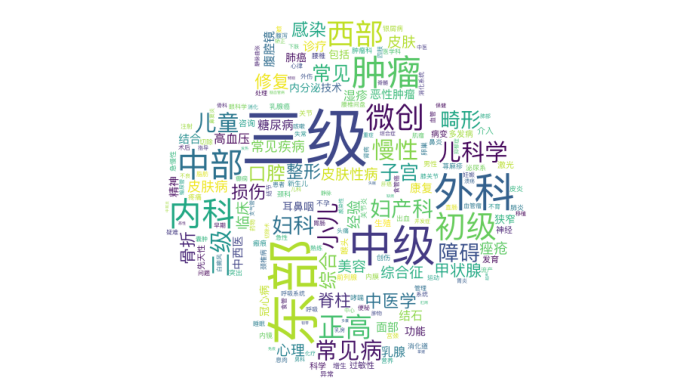

In [374]:
# 导入相应的库
from wordcloud import WordCloud
import PIL
import re
# # 导入文本数据并进行简单的文本处理
# # 去掉换行符和空格以及标点符号
# text = open("/Users/jiangshihua/Desktop/ciyun_1.0.txt",encoding='utf8').read()
# text = text.replace('\n',"").replace("，","").replace("。","").replace("、","").replace("；","").replace("！","").replace("：","").replace("[","").replace("]","")#.replace("\t","' ,   '")
# #text =re.sub(r'\\t|\\n','',text)

# # 分词，返回结果为词的列表
# text_cut = text

#停用词库
stop_words = open("/Users/jiangshihua/Desktop/stopwords.txt",encoding="GB18030").read()#.split("\n")
stop_words = stop_words.replace("'"," ")

# # 将分好的词用某个符号分割开连成字符串
# text_cut = ' '.join(text_cut)
# #print(text_cut)

import jieba

txt = open("/Users/jiangshihua/Desktop/ciyun_7.0.txt",encoding='utf8').read()
words = jieba.lcut(txt)     # 使用精确模式对文本进行分词
counts = {}     # 通过键值对的形式存储词语及其出现的次数

for word in words:
    if len(word) == 1:    # 单个词语不计算在内
        continue
    else:
        counts[word] = counts.get(word, 0) + 1    # 遍历所有词语，每出现一次其对应的值加 1

items = list(counts.items())
items.sort(key=lambda x: x[1], reverse=True)    # 根据词语出现的次数进行从大到小排序

items_dict = {}
for i in range(len(items)):
    if items[i][0] not in stop_words:
        items_dict[items[i][0]] = items[i][1]
# frequence = []
# for i in range(100):
#     word, count = items[i]
#     #print("{0:<5}{1:>5}".format(word, count))
#     frequence.append(count)
    
#词云形状
image1 = PIL.Image.open('/Users/jiangshihua/Desktop/background.png')
MASK = np.array(image1)
 
#绘制词云
word_cloud = WordCloud(font_path="/System/Library/Fonts/PingFang.ttc", 
                       width=800,
                       height=400,
                       background_color="white", 
                       mask=MASK,                # 指定词云的形状
                       stopwords=stop_words,
                       #font_step=4
                       #min_word_length = 2
                       )
word_cloud.generate_from_frequencies(items_dict)
#word_cloud.generate(text_cut)

# 运用matplotlib展现结果
plt.subplots(figsize=(12,8))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()